In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('telecom_churn.csv')

In [4]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [5]:
# Machine Learning
## Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [6]:
pip install ptitprince

Note: you may need to restart the kernel to use updated packages.


In [7]:
import ptitprince

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [9]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [10]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [11]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [13]:
discrete_features=[features for features in df.columns if len(df[features].unique())<20]

In [14]:
df[discrete_features]

,Churn,ContractRenewal,DataPlan,CustServCalls
0,0,1,1,1
1,0,1,1,1
2,0,1,0,0
3,0,0,0,2
4,0,0,0,3
...,...,...,...,...
3328,0,1,1,2
3329,0,1,0,3
3330,0,1,0,2
3331,0,0,0,2


array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

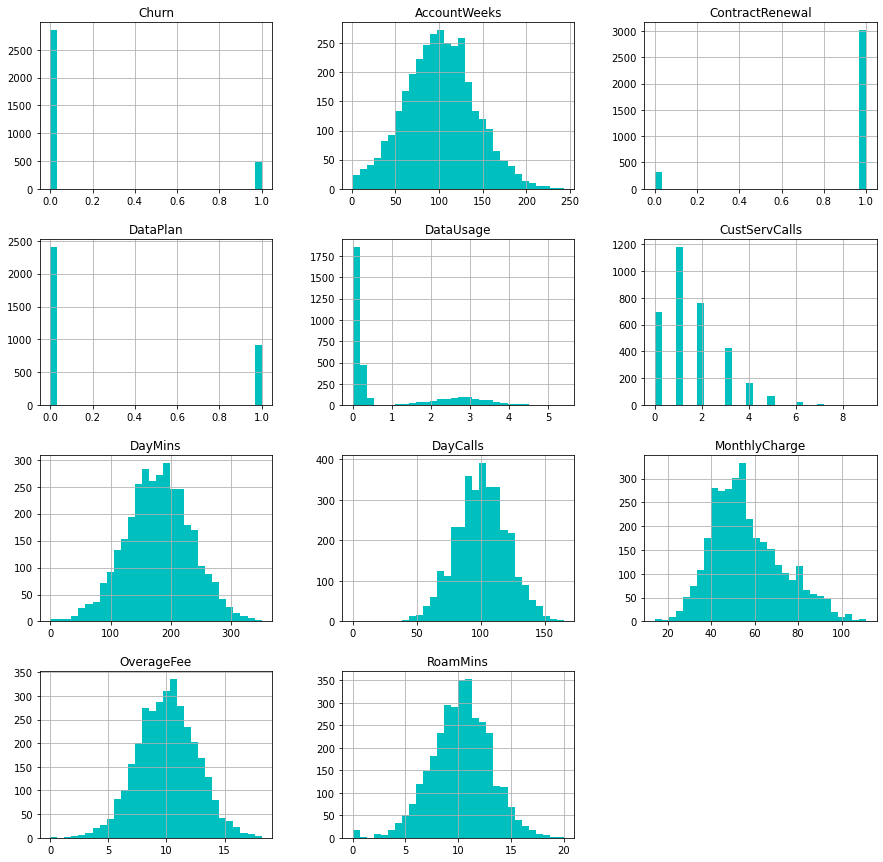

In [15]:
df.hist(figsize=(15,15), bins=30, color='c')

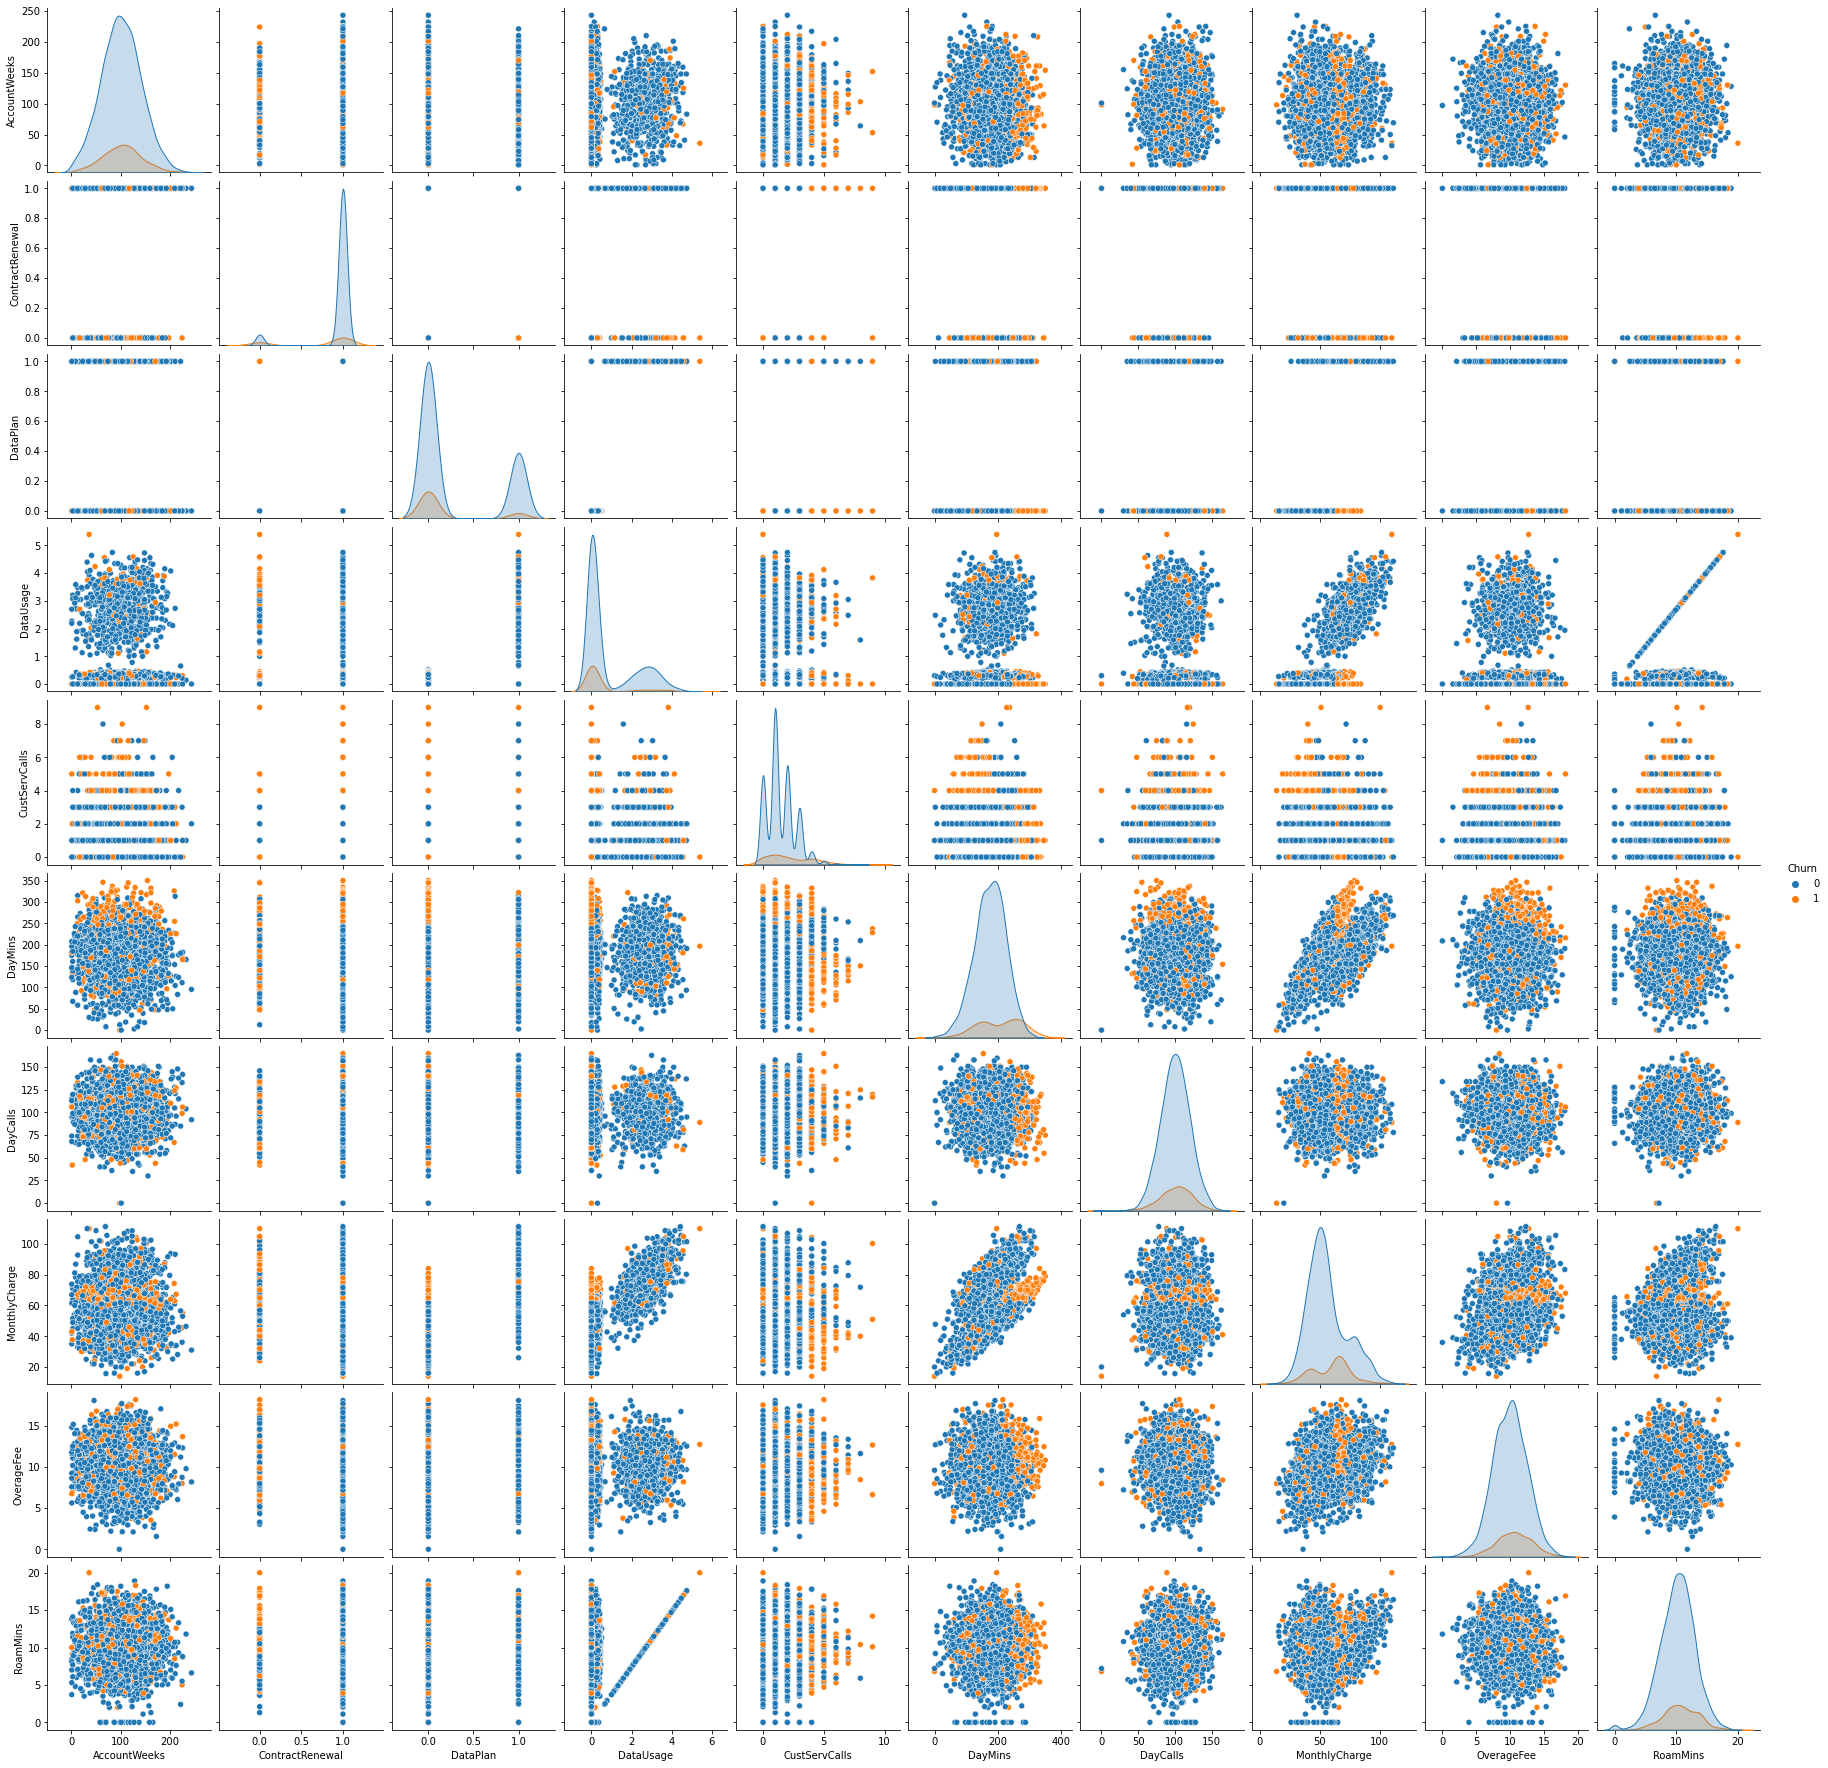

In [16]:

sns.pairplot(df, hue="Churn")

<AxesSubplot:title={'center':'Churned Ratio'}, ylabel='Churn'>

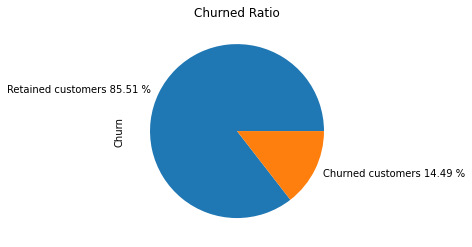

In [17]:
df["Churn"].value_counts().plot(kind="pie", title="Churned Ratio",
                                labels = ["Retained customers {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned customers {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

In [18]:
len(df.loc[df.Churn==0])/len(df.Churn)*100

85.5085508550855

In [19]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [20]:
ContractRenewal_churn=df.groupby('ContractRenewal')['Churn'].mean()

<AxesSubplot:title={'center':'Do People who dont renew their contract churn?'}, ylabel='ContractRenewal'>

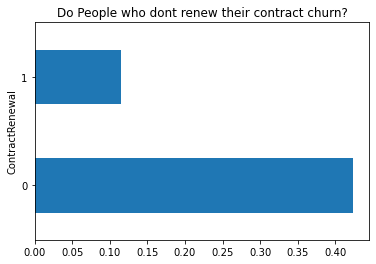

In [21]:
ContractRenewal_churn.plot(kind='barh',title='Do People who dont renew their contract churn?')

# People Who dont renew their contracts are likely to churn

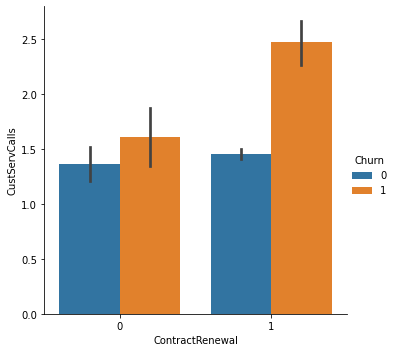

In [22]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df)

People Who renewed their contracts and churned have #called customer care service more than anybody else

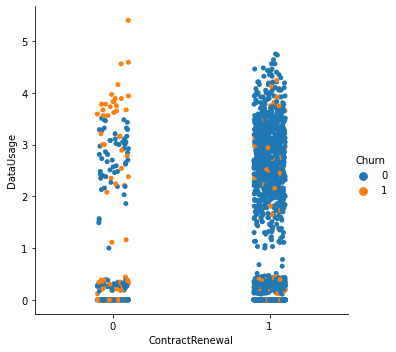

In [23]:
sns.catplot(x="ContractRenewal", y="DataUsage", hue="Churn", data=df)

In [24]:
Contract_dataUsage = df.groupby('ContractRenewal')['DataUsage'].mean()

<AxesSubplot:ylabel='Density'>

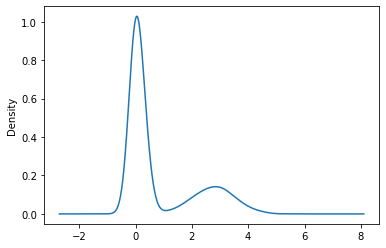

In [25]:
df['DataUsage'].plot(kind='kde')

<AxesSubplot:ylabel='ContractRenewal'>

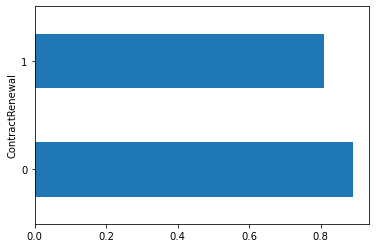

In [26]:
Contract_dataUsage.plot(kind='barh')

Ppl who didnt renew their contracts have higher data usage

In [27]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [28]:
continuous_features = [features for features in df.columns  if features not in df[discrete_features]]

<AxesSubplot:>

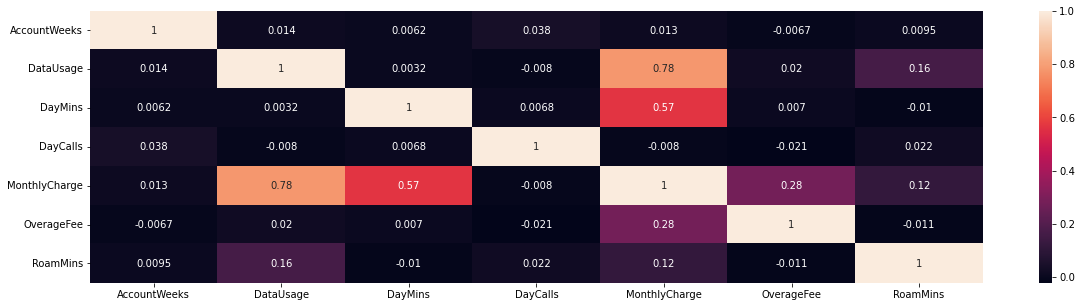

In [29]:
plt.figure(figsize=(20,5))
sns.heatmap(df[continuous_features].corr(),annot = True)

In [30]:
df.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [31]:
df1 = df.loc[df["Churn"]==1] # Churned Customers
df0 = df.loc[df["Churn"]==0] # Existing Customers

Text(0.5, 1.0, 'Churn=0')

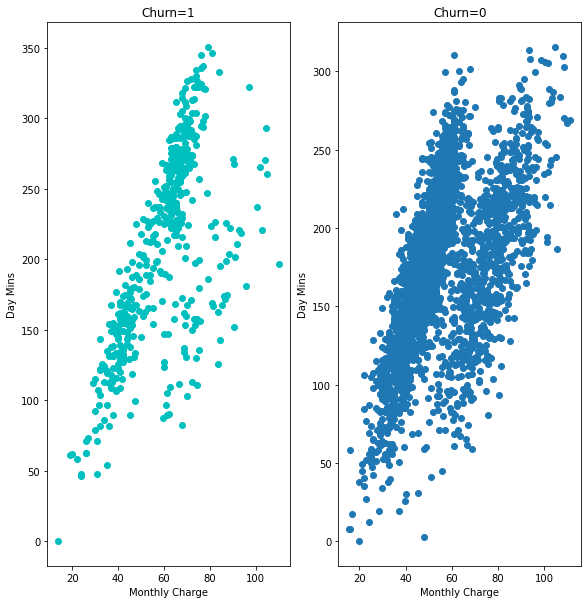

In [32]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(1,4,1)
plt.plot(df1["MonthlyCharge"], df1["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")
plt.subplot(1,4,2)
plt.plot(df0["MonthlyCharge"], df0["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")


Text(0.5, 1.0, 'Churn=0')

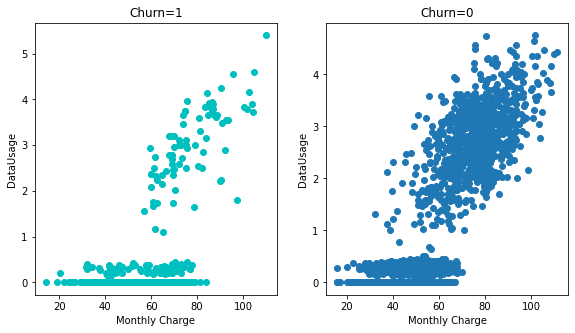

In [33]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.subplot(1,4,1)
plt.plot(df1["MonthlyCharge"], df1["DataUsage"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("DataUsage")
plt.title("Churn=1")
plt.subplot(1,4,2)
plt.plot(df0["MonthlyCharge"], df0["DataUsage"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

# Customer Segmentation

In [34]:
# Manual Customer Segmentaion
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Custoemrs in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

Text(0.5, 1.0, 'Segment 2 Churn=1')

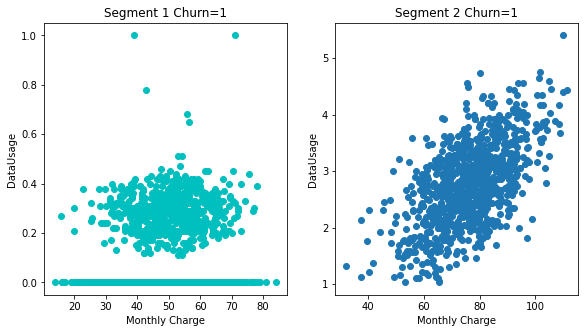

In [35]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.subplot(1,4,1)
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("DataUsage")
plt.title("Segment 1 Churn=1")
plt.subplot(1,4,2)
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("DataUsage")
plt.title("Segment 2 Churn=1")

<AxesSubplot:>

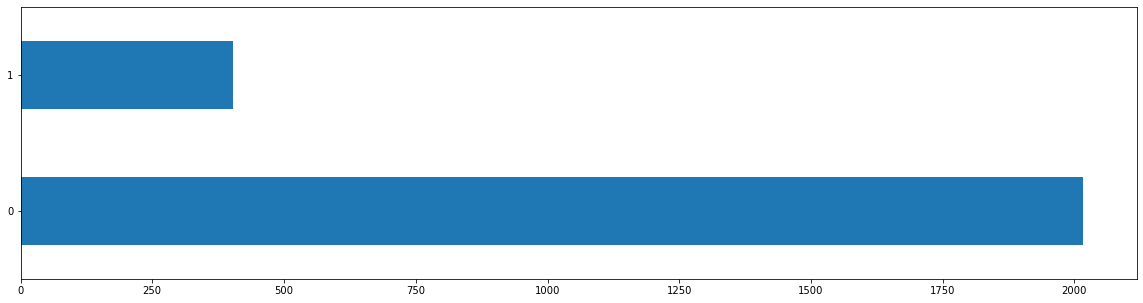

In [36]:
seg1['Churn'].value_counts().plot(kind='barh')

#Percentage of Retention in both these segmnets

<AxesSubplot:>

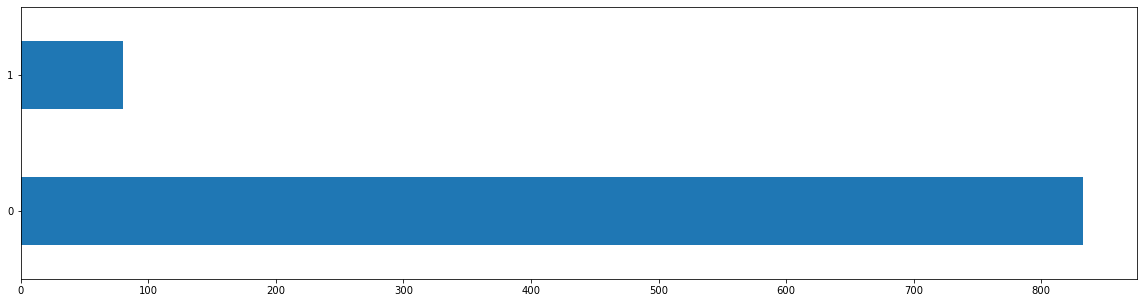

In [37]:
seg2['Churn'].value_counts().plot(kind='barh')

<AxesSubplot:title={'center':'Churned Ratio'}, ylabel='Churn'>

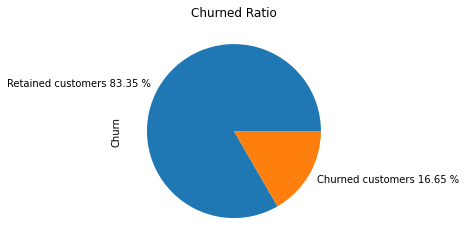

In [38]:
seg1["Churn"].value_counts().plot(kind="pie", title="Churned Ratio",
                                labels = ["Retained customers {:.2f} %".format(len(seg1.loc[seg1.Churn==0])*100/len(seg1.Churn)),
                                          "Churned customers {:.2f} %".format(len(seg1.loc[seg1.Churn==1])*100/len(seg1.Churn))],
                                figsize=(4,4))

<AxesSubplot:title={'center':'Churned Ratio'}, ylabel='Churn'>

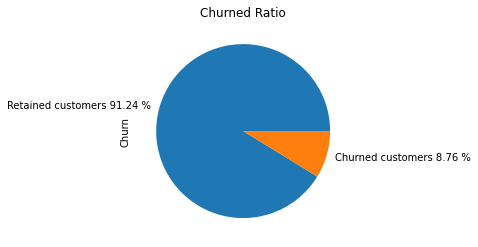

In [39]:
seg2["Churn"].value_counts().plot(kind="pie", title="Churned Ratio",
                                labels = ["Retained customers {:.2f} %".format(len(seg2.loc[seg2.Churn==0])*100/len(seg2.Churn)),
                                          "Churned customers {:.2f} %".format(len(seg2.loc[seg2.Churn==1])*100/len(seg2.Churn))],
                                figsize=(4,4))

In [40]:
seg1.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1


In [41]:
seg2.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2
16,0,85,1,1,3.73,1,196.4,139,95.3,14.05,13.8


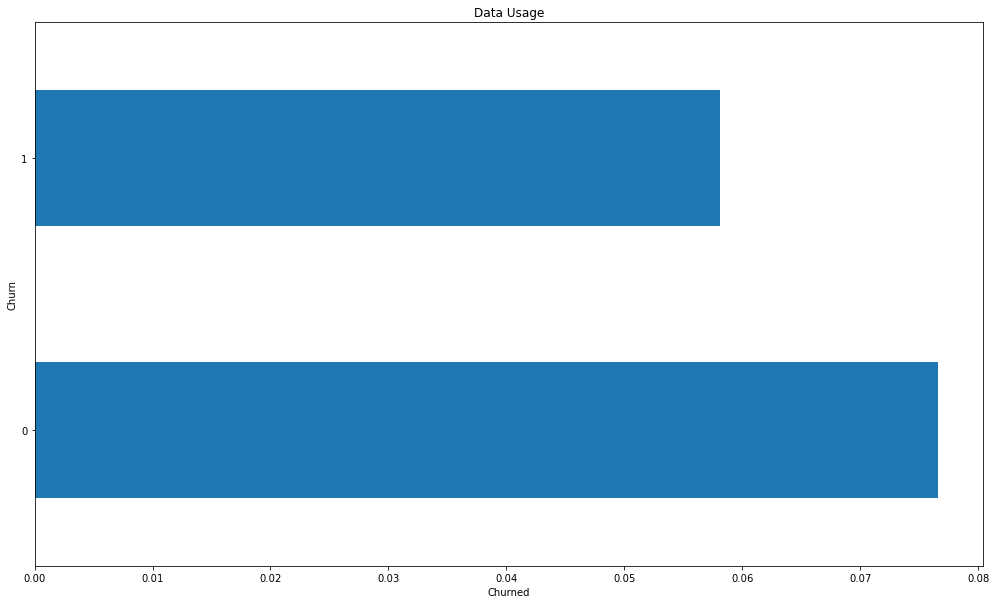

In [42]:
plt.figure(figsize=(17,10))
datausageofchurnedcustomers =seg1.groupby('Churn')['DataUsage'].mean()
datausageofchurnedcustomers.plot(kind='barh')
plt.title("Data Usage" )
plt.xlabel("Churned")
plt.show()

In [43]:
datausageofchurnedcustomers =df.groupby('Churn')['DataUsage'].mean()

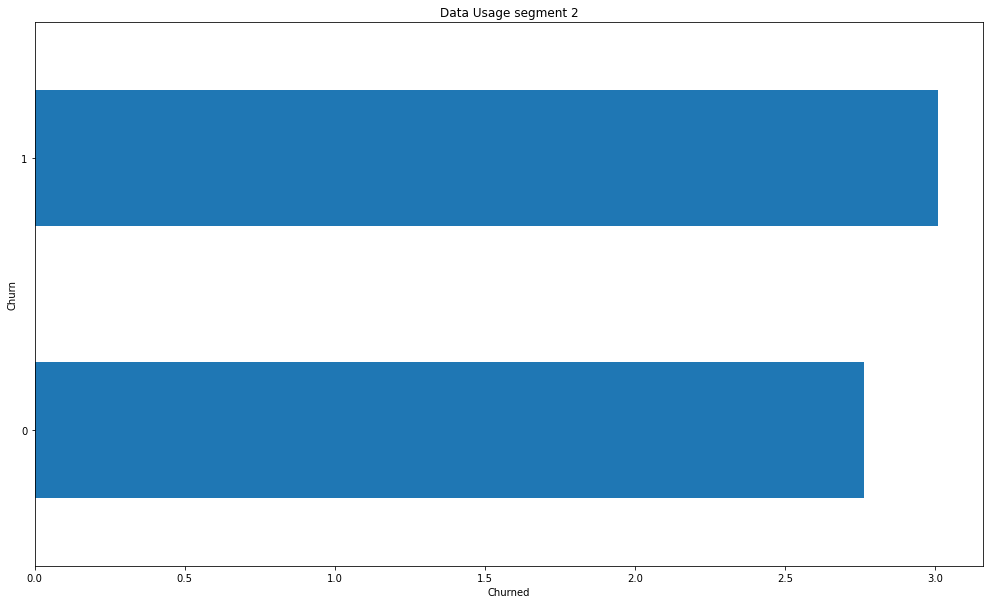

In [44]:
plt.figure(figsize=(17,10))
datausageofchurnedcustomersseg2 =seg2.groupby('Churn')['DataUsage'].mean()
datausageofchurnedcustomersseg2.plot(kind='barh')
plt.title("Data Usage segment 2" )
plt.xlabel("Churned")
plt.show()

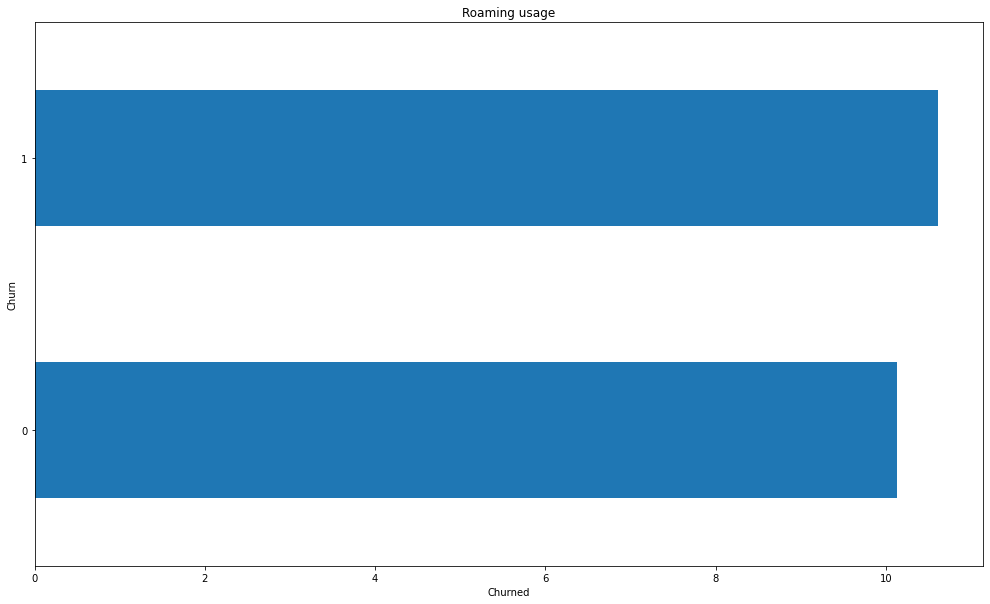

In [45]:
plt.figure(figsize=(17,10))
datausageofchurnedcustomers =seg1.groupby('Churn')['RoamMins'].mean()
datausageofchurnedcustomers.plot(kind='barh')
plt.title("Roaming usage" )
plt.xlabel("Churned")
plt.show()

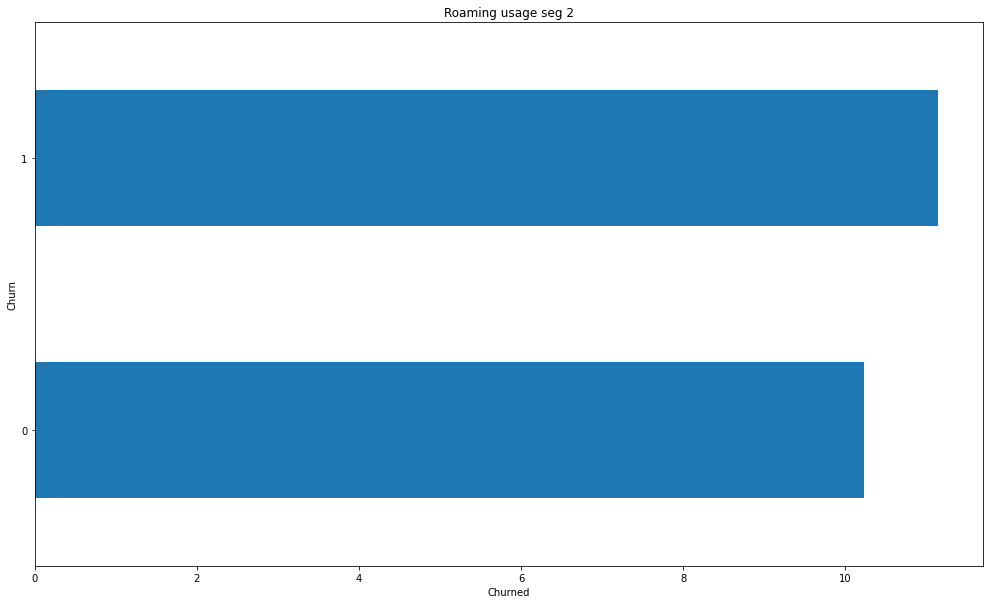

In [46]:
plt.figure(figsize=(17,10))
datausageofchurnedcustomers =seg2.groupby('Churn')['RoamMins'].mean()
datausageofchurnedcustomers.plot(kind='barh')
plt.title("Roaming usage seg 2" )
plt.xlabel("Churned")
plt.show()

# Both these Segmenst have same percentage of roaming mins

Text(0.5, 1.0, 'Churn=0&1')

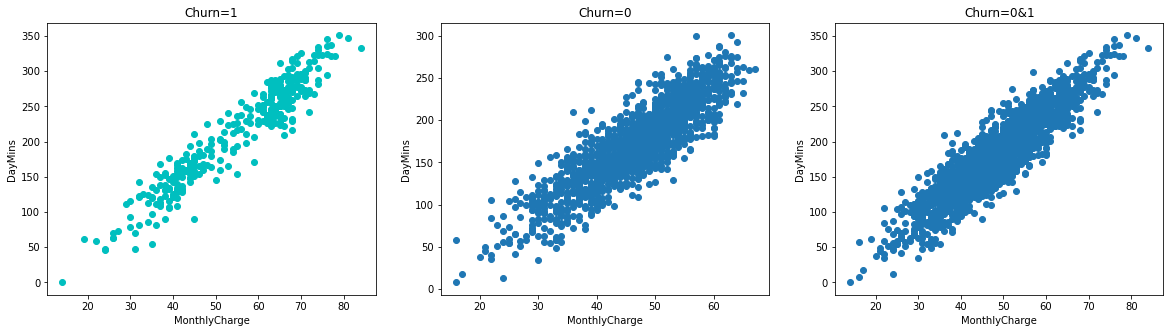

In [47]:
dataus0 = seg1.loc[seg1["DataUsage"]==0] # Customers with Data Usage zero in seg1.

dataus00 = dataus0.loc[dataus0["Churn"]==0] # Existing Customers with Data Usage zero in seg1.
dataus01 = dataus0.loc[dataus0["Churn"]==1] # Churned Customers with Data Usage zero in seg1.

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(dataus01["MonthlyCharge"], dataus01["DayMins"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(dataus00["MonthlyCharge"], dataus00["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(dataus0["MonthlyCharge"], dataus0["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0&1")

# More on Customers with zero data usage

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


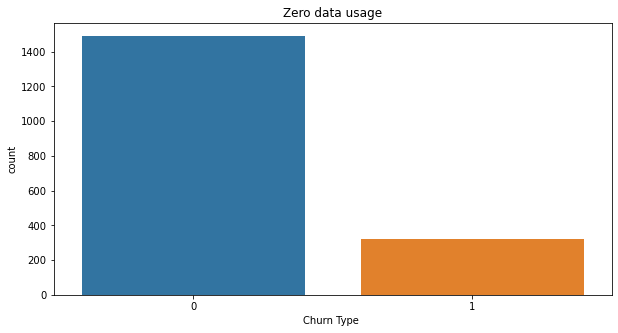

In [48]:
#Do people with zero usage churn more ?
plt.figure(figsize=(10,5))
sns.countplot(dataus0['Churn'])
plt.title("Zero data usage")
plt.xlabel("Churn Type ")
plt.show()



In [49]:
dataus0.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1


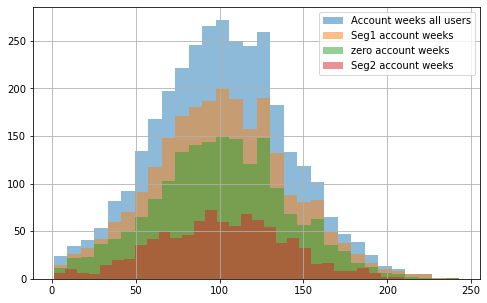

In [50]:

plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, alpha=0.5, label='Account weeks all users')
seg1["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg1 account weeks')
dataus0["AccountWeeks"].hist(bins=30, alpha=0.5, label='zero account weeks')
seg2["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg2 account weeks')
plt.legend()



Customers from segmnet 1 have had been active for more no of weeks than others

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Contract Renewel Segment 2')

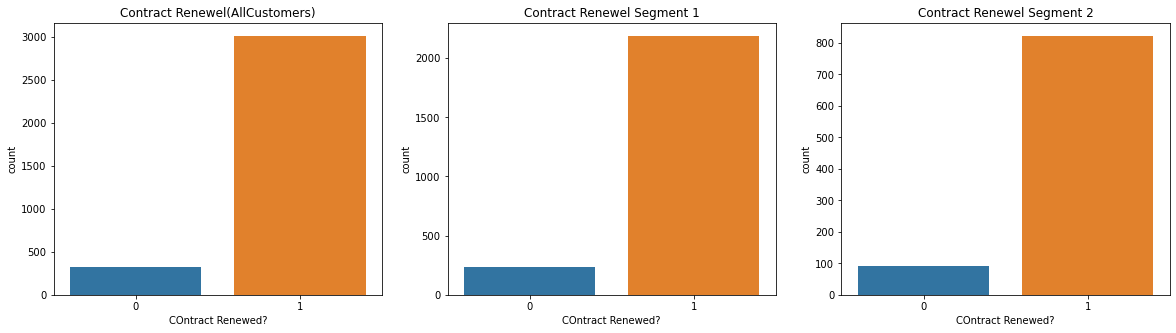

In [51]:
plt.figure(figsize=(20,5))

plt.subplot(131)
sns.countplot(df['ContractRenewal'])
plt.xlabel("COntract Renewed?")

plt.title("Contract Renewel(AllCustomers)")


plt.subplot(132)
sns.countplot(seg1['ContractRenewal'])
plt.xlabel("COntract Renewed?")
plt.title("Contract Renewel Segment 1")

plt.subplot(133)
sns.countplot(seg2['ContractRenewal'])
plt.xlabel("COntract Renewed?")
plt.title("Contract Renewel Segment 2")



In [52]:
dataus0.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Contract Renewel Segment 1')

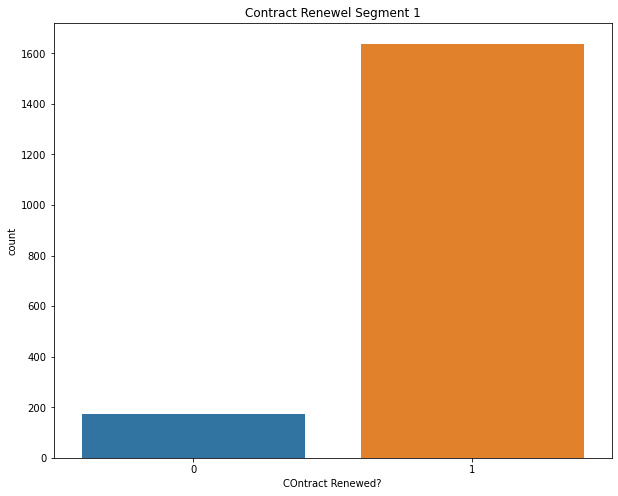

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(dataus0['ContractRenewal'])
plt.xlabel("COntract Renewed?")
plt.title("Contract Renewel Segment 1")

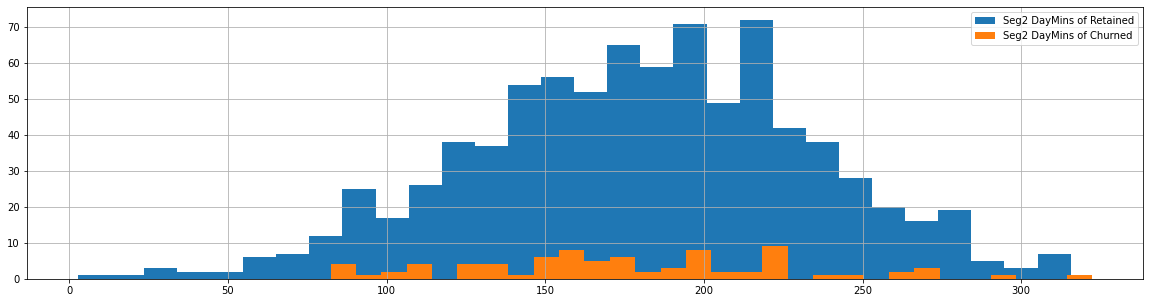

In [54]:
seg20["DayMins"].hist(bins=30, label='Seg2 DayMins of Retained') 
seg21["DayMins"].hist(bins=30, label='Seg2 DayMins of Churned') 
plt.legend()



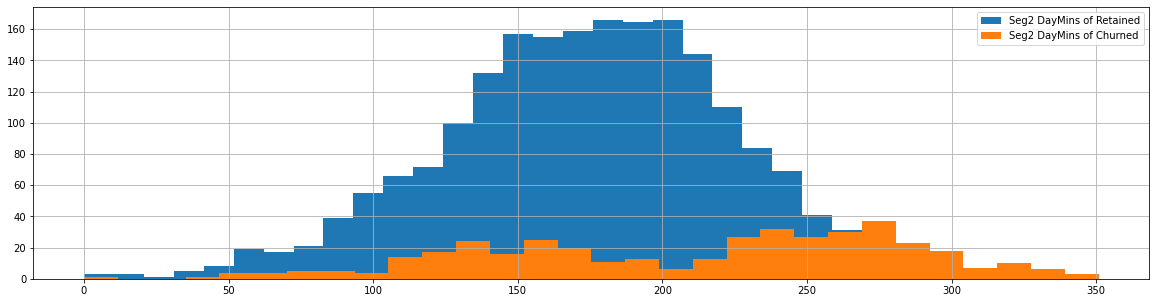

In [55]:
seg10["DayMins"].hist(bins=30, label='Seg2 DayMins of Retained') 
seg11["DayMins"].hist(bins=30, label='Seg2 DayMins of Churned') 
plt.legend()

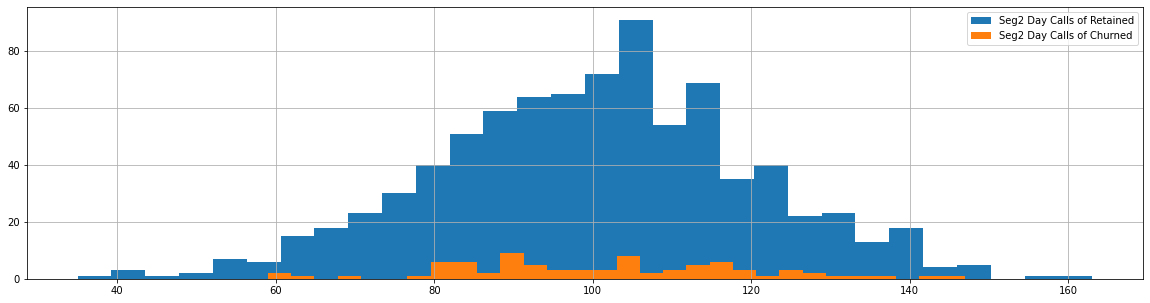

In [56]:
seg20["DayCalls"].hist(bins=30, label='Seg2 Day Calls of Retained') 
seg21["DayCalls"].hist(bins=30, label='Seg2 Day Calls of Churned') 
plt.legend()


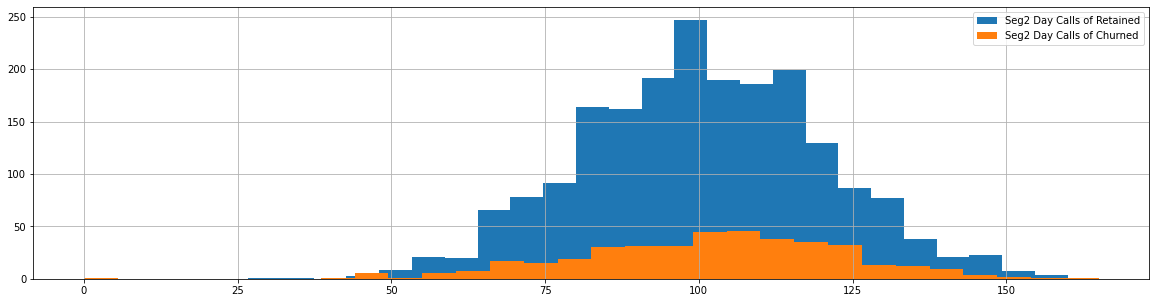

In [57]:
seg10["DayCalls"].hist(bins=30, label='Seg2 Day Calls of Retained') 
seg11["DayCalls"].hist(bins=30, label='Seg2 Day Calls of Churned') 
plt.legend()

# Churned Customers from both the segmnets have less average number of daytime calls

<AxesSubplot:xlabel='DataUsage', ylabel='Churn'>

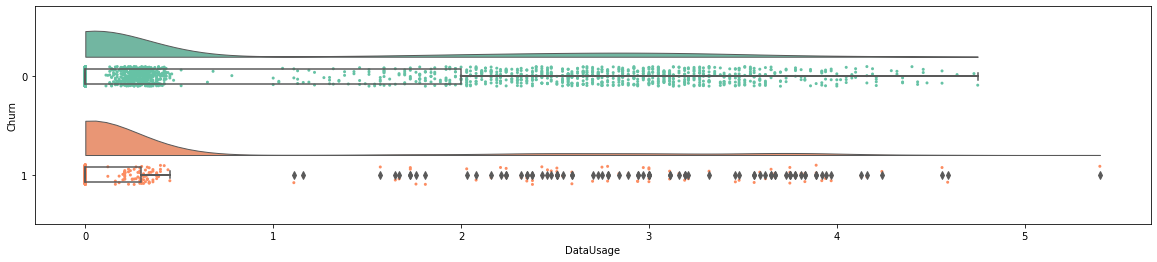

In [58]:
plt.figure(figsize=(20,4))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

In [59]:
seg1.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1


Text(0.5, 1.0, 'Seg 1 Churned Average Monthly Charge')

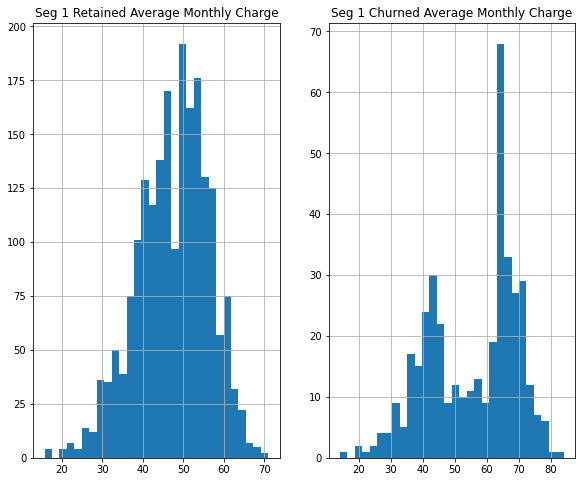

In [60]:
plt.figure(figsize=(15,8))
plt.subplot(131)
seg10["MonthlyCharge"].hist(bins=30, label='Retained Average Monthly Charge') 
plt.title('Seg 1 Retained Average Monthly Charge')


plt.subplot(132)
seg11["MonthlyCharge"].hist(bins=30, label='Churned Average Monthly Charge') 
plt.title('Seg 1 Churned Average Monthly Charge')


Text(0.5, 1.0, 'Seg 2 Churned Average Monthly Charge')

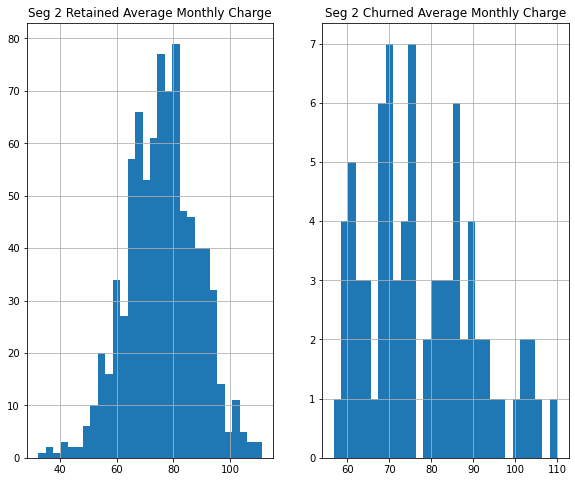

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(131)
seg20["MonthlyCharge"].hist(bins=30, label='Retained Average Monthly Charge') 
plt.title('Seg 2 Retained Average Monthly Charge')


plt.subplot(132)
seg21["MonthlyCharge"].hist(bins=30, label='Churned Average Monthly Charge') 
plt.title('Seg 2 Churned Average Monthly Charge')


In [62]:

seg1.describe()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.00000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000
mean,0.166529,101.060331,0.904132,0.003719,0.073517,1.57438,179.716322,100.557025,48.803347,10.014103,10.207769
std,0.372632,40.244464,0.294471,0.060883,0.134613,1.31258,54.895383,20.182294,10.341518,2.548489,2.833838
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.00000,143.700000,87.000000,42.000000,8.300000,8.500000
50%,0.000000,100.000000,1.000000,0.000000,0.000000,1.00000,179.150000,101.000000,49.000000,10.010000,10.300000
75%,0.000000,127.000000,1.000000,0.000000,0.112500,2.00000,216.200000,114.000000,56.000000,11.710000,12.100000
max,1.000000,243.000000,1.000000,1.000000,1.000000,9.00000,350.800000,165.000000,84.000000,18.190000,18.900000


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

<AxesSubplot:xlabel='DayMins', ylabel='Density'>

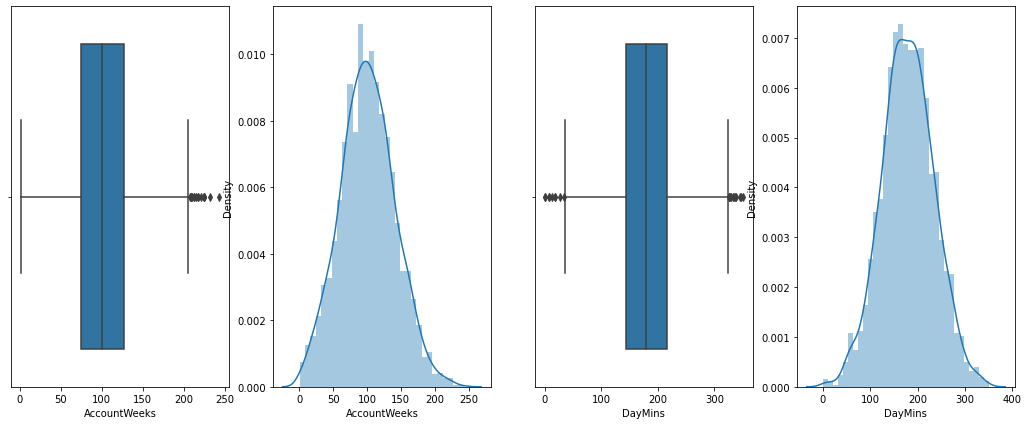

In [63]:

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1,4,1)
sns.boxplot(seg1['AccountWeeks'])

plt.subplot(1,4,2)
sns.distplot(seg1['AccountWeeks'])

plt.subplot(1,4,3)
sns.boxplot(seg1['DayMins'])

plt.subplot(1,4,4)
sns.distplot(seg1['DayMins'])




/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MonthlyCharge'>

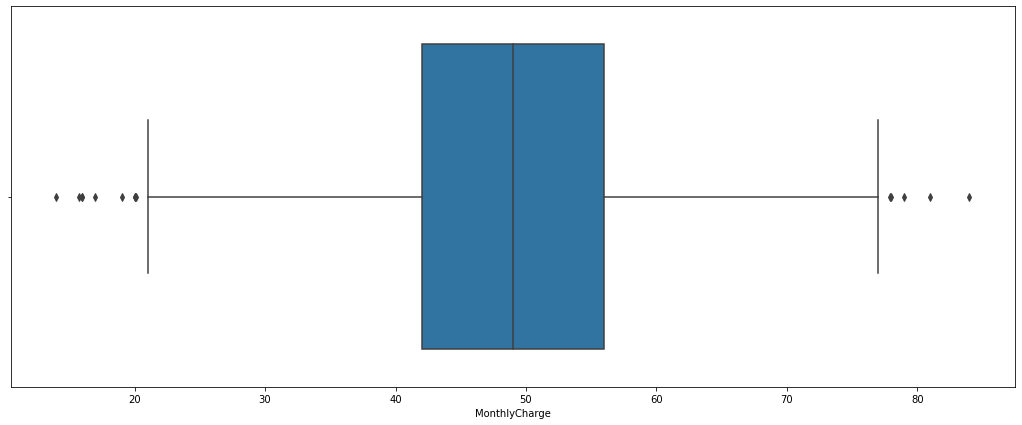

In [64]:

sns.boxplot(seg1['MonthlyCharge'])


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

<AxesSubplot:xlabel='DayMins', ylabel='Density'>

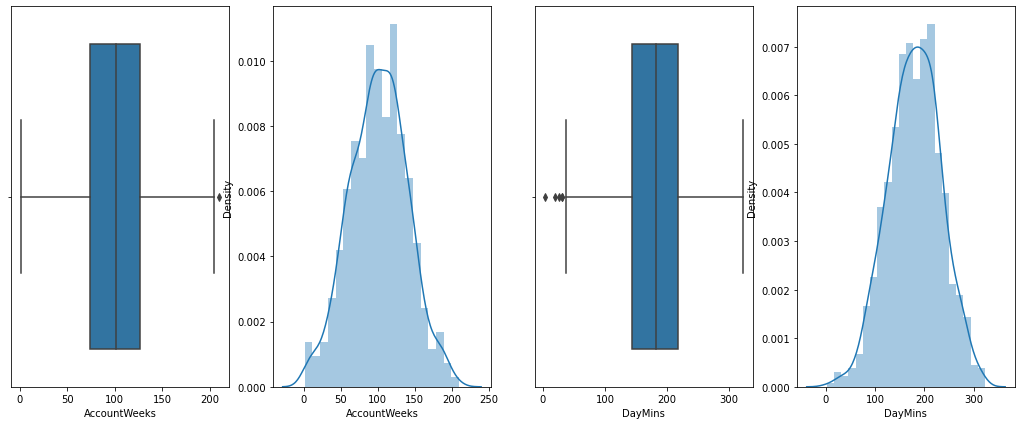

In [65]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1,4,1)
sns.boxplot(seg2['AccountWeeks'])

plt.subplot(1,4,2)
sns.distplot(seg2['AccountWeeks'])

plt.subplot(1,4,3)
sns.boxplot(seg2['DayMins'])

plt.subplot(1,4,4)
sns.distplot(seg2['DayMins'])


In [66]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


20426.3 mins, per 2017 customers who not churned.
4276.5 mins, per 403 customers who churned.


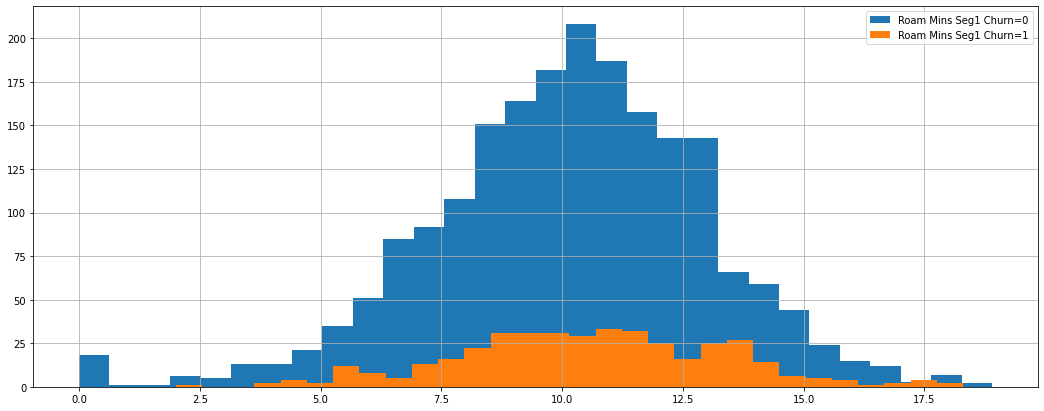

In [67]:
seg10["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=0')
seg11["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=1') 
plt.legend()

print(f"{seg10.RoamMins.sum()} mins, per {len(seg10.RoamMins)} customers who not churned.")
print(f"{seg11.RoamMins.sum()} mins, per {len(seg11.RoamMins)} customers who churned.")

In [68]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# Contract Renewal

In [74]:
seg10.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3
7,0,147,0,0,0.0,0,157.0,79,36.0,5.16,7.1


In [72]:
seg11.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7
15,1,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4
21,1,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7
33,1,12,1,0,0.00,1,249.6,118,64.0,12.62,11.8
48,1,119,1,0,0.00,5,159.1,114,47.0,11.57,8.8


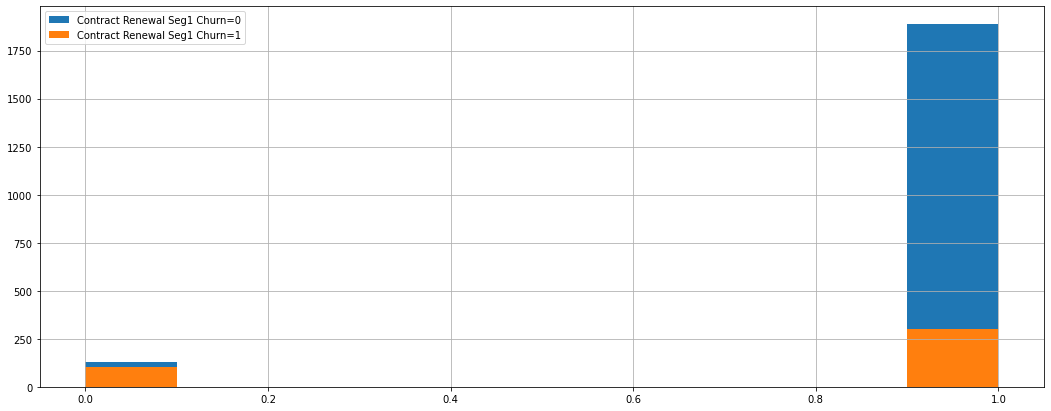

In [75]:
seg10["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=0') 
seg11["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=1')
plt.legend() 

In [76]:
seg11["ContractRenewal"].value_counts()

1    302
0    101
Name: ContractRenewal, dtype: int64

In [78]:
seg10["ContractRenewal"].value_counts()

1    1886
0     131
Name: ContractRenewal, dtype: int64

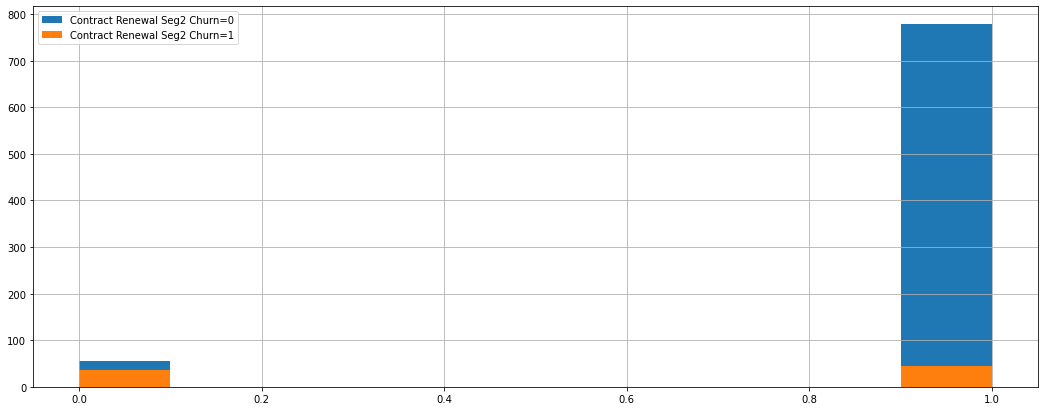

In [79]:

seg20["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=0')
seg21["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=1')
plt.legend()



In [80]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# Steps to Retain Customers

    More Customer Service calls mean the customer is more prone to churn.
    Optimise price of talk time for segment 1 customers.
    Introduce data plan to those customers who are using data without data plans ASAP.
    Introduce exciting data plans to segment 1 customers.
    If possible optimising price of data plans can retain segment 2 customers also.



/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MonthlyCharge'>

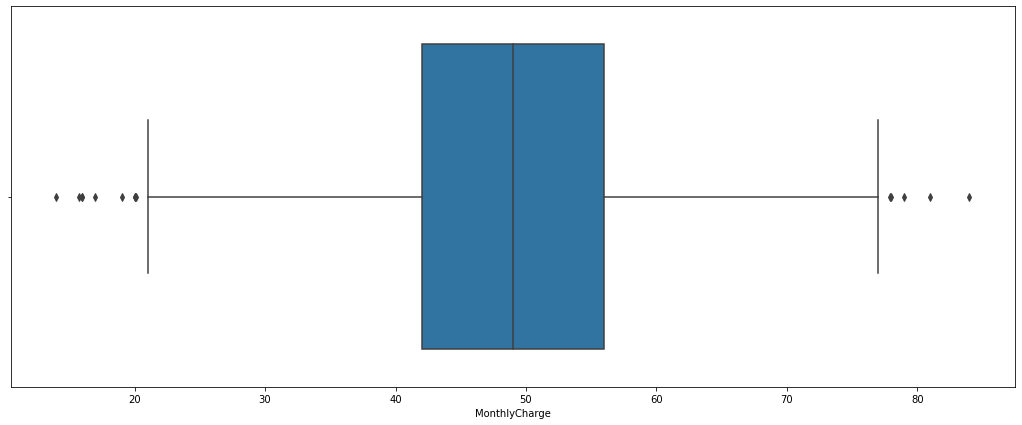

In [86]:
sns.boxplot(seg1['MonthlyCharge'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MonthlyCharge'>

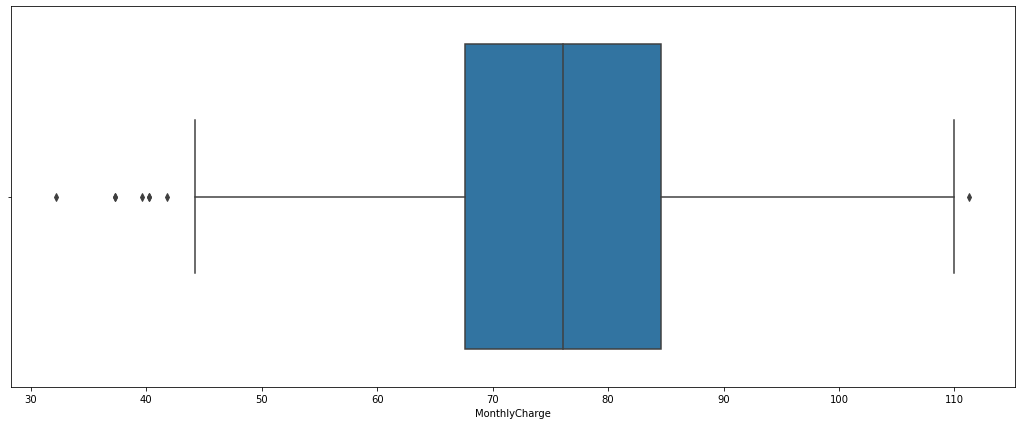

In [87]:
sns.boxplot(seg2['MonthlyCharge'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DataUsage'>

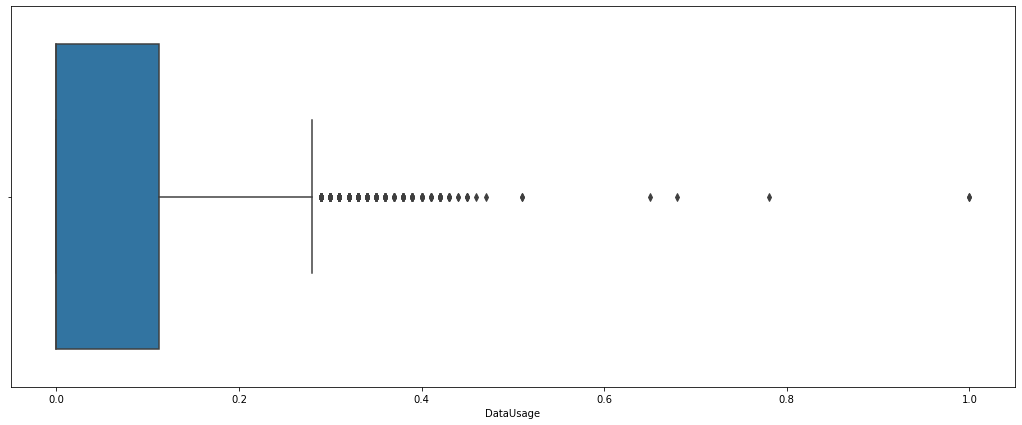

In [89]:
sns.boxplot(seg1['DataUsage'])  #Introduce exciting data plans to segment 1 customers.

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DayMins'>

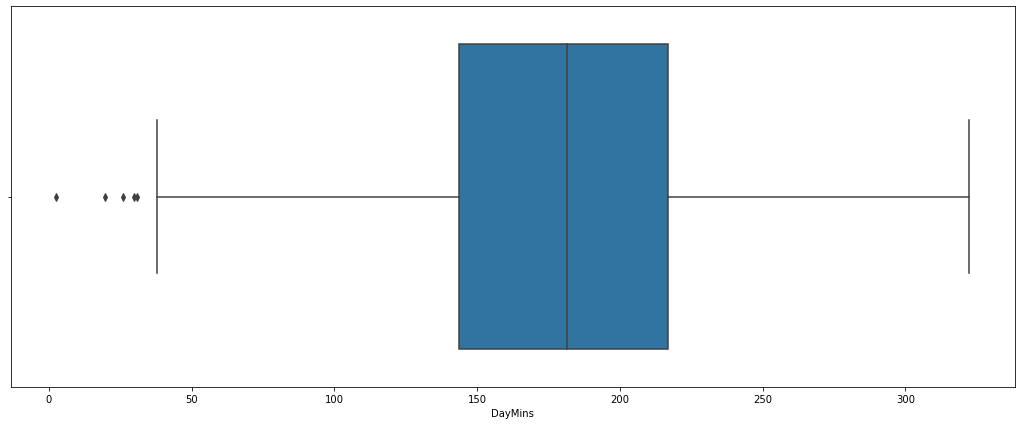

In [91]:
sns.boxplot(seg2['DayMins'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DayMins'>

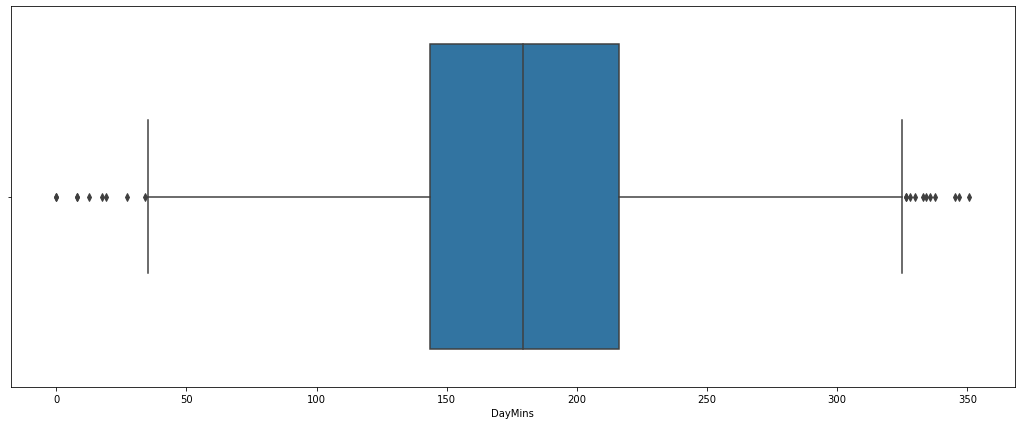

In [92]:
sns.boxplot(seg1['DayMins'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DayCalls'>

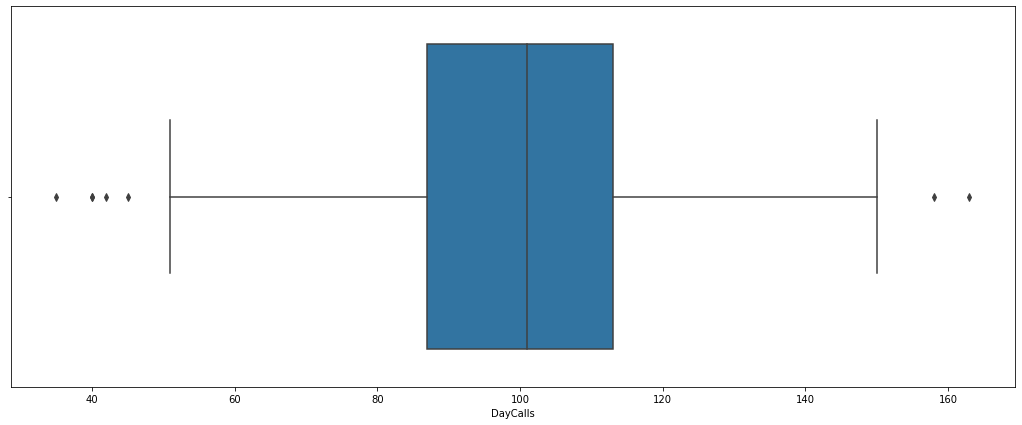

In [93]:
#DayCalls
sns.boxplot(seg2['DayCalls'])


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DayCalls'>

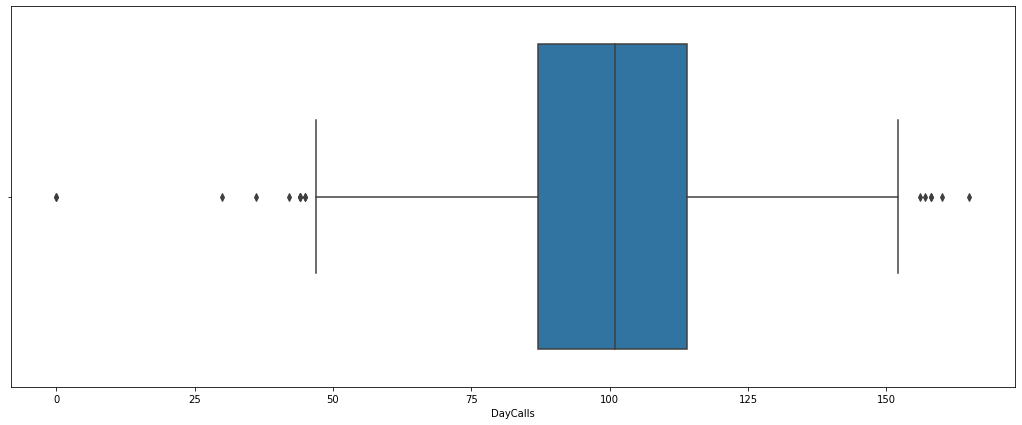

In [94]:
sns.boxplot(seg1['DayCalls'])

In [95]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

<AxesSubplot:xlabel='RoamMins', ylabel='Density'>

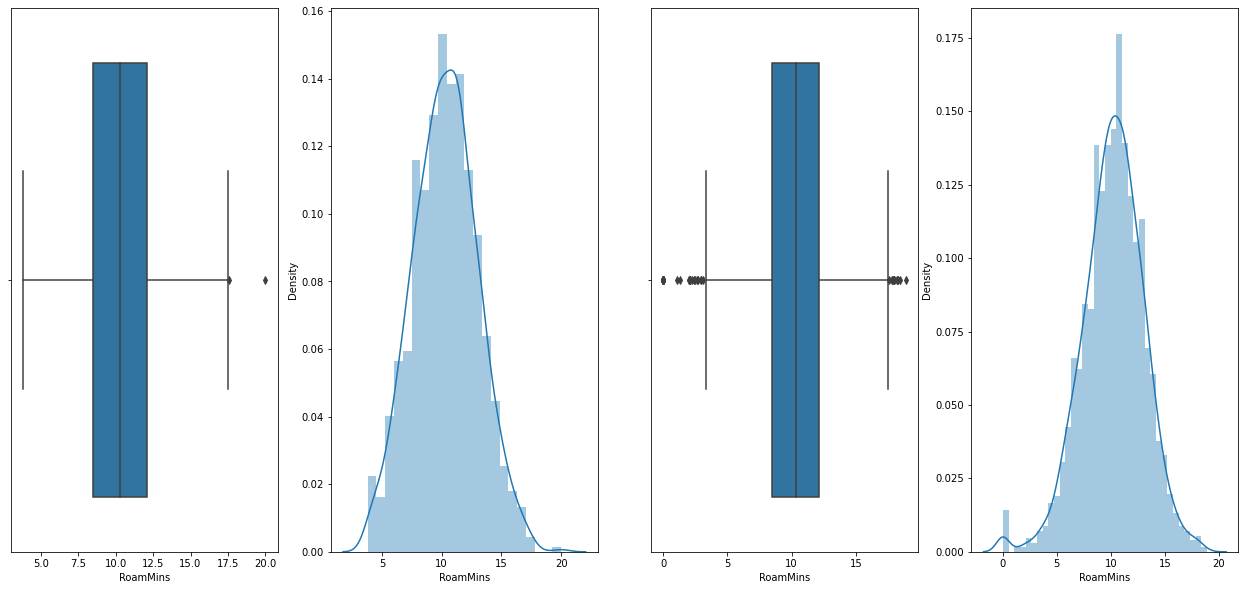

In [98]:
plt.rcParams['figure.figsize'] = (22, 10)

plt.subplot(1,4,1)
sns.boxplot(seg2['RoamMins'])

plt.subplot(1,4,2)
sns.distplot(seg2['RoamMins'])

plt.subplot(1,4,3)
sns.boxplot(seg1['RoamMins'])

plt.subplot(1,4,4)
sns.distplot(seg1['RoamMins'])


# Hypothesis testing 


Null Hypothesis: Customers that use data without subscribing to a data plan are more likely to churn.

Alternate Hypothesis: Customers that use data without subscribing to a data plan are unlikely to churn.


# Permutations

    In this test random sample of 50 customers will be taken.
    That 50 customers will be in two groups.
    Group2: Customers which are using data without subscribing data plan.
    Group1: All remaining Customers which are not in Group2.
    Find the churn ratio in both groups.



In [109]:
# 1000 Permutations
# churn in only customers using data without dataplan 

population_churn = []   # Remaining customers (not in Group2) churn % in sample (Group 1)
no_data_plan_churn = []   # Churn % in data users, without data plan (Group 2)

for i in range(0,1000):
  sample = df.sample(n=50)
  sample_churn = sample.loc[~(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  sample_churn_data_plan = sample.loc[(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  population_churn.append(sample_churn)
  no_data_plan_churn.append(sample_churn_data_plan)

In [108]:
df.loc[~(df['DataPlan']==0)&(df['DataUsage']>0)]['Churn'].value_counts(normalize=True)

0    0.912854
1    0.087146
Name: Churn, dtype: float64

In [106]:
 df.loc[(df['DataPlan']==0)&(df['DataUsage']>0)]['Churn'].value_counts(normalize=True)

0    0.865449
1    0.134551
Name: Churn, dtype: float64

In [112]:
population_churn = pd.DataFrame(population_churn)
no_data_plan_churn = pd.DataFrame(no_data_plan_churn)

In [113]:
population_churn

,0,1
Churn,0.928571,0.071429
Churn,1.000000,NaN
Churn,1.000000,NaN
Churn,0.823529,0.176471
Churn,1.000000,NaN
...,...,...
Churn,0.937500,0.062500
Churn,0.933333,0.066667
Churn,0.857143,0.142857
Churn,0.888889,0.111111


In [114]:
population_churn[1].mean()

0.12336266992299007

In [115]:
population_churn[0].mean()

0.9129059550343691

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

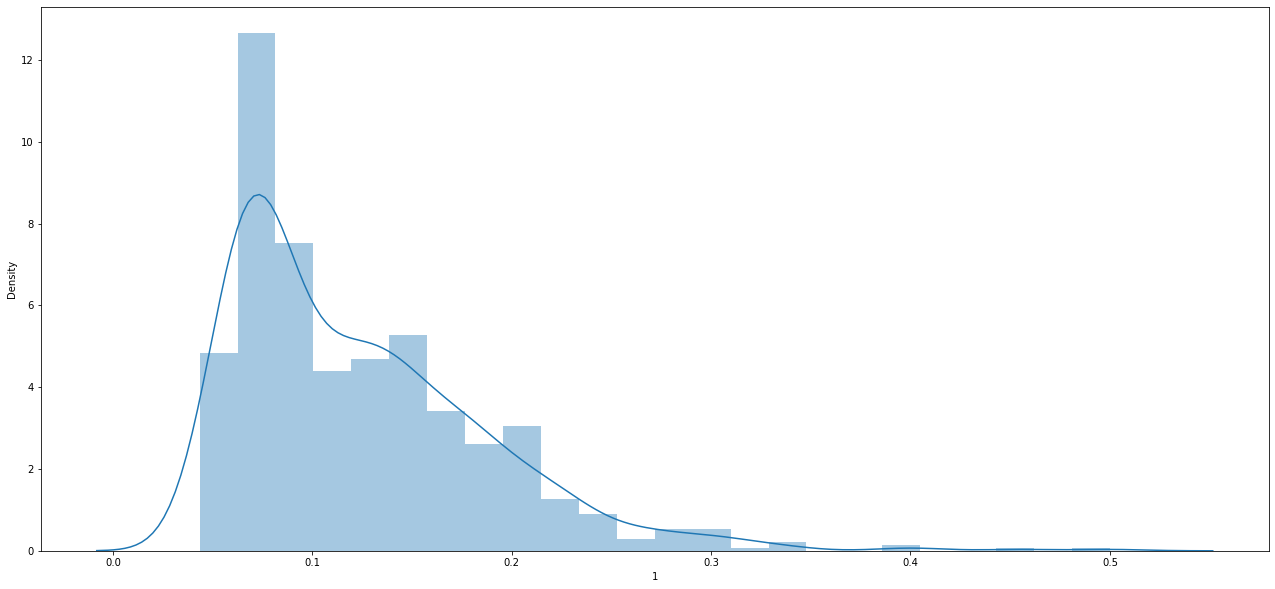

In [116]:


sns.distplot(population_churn[1])



/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

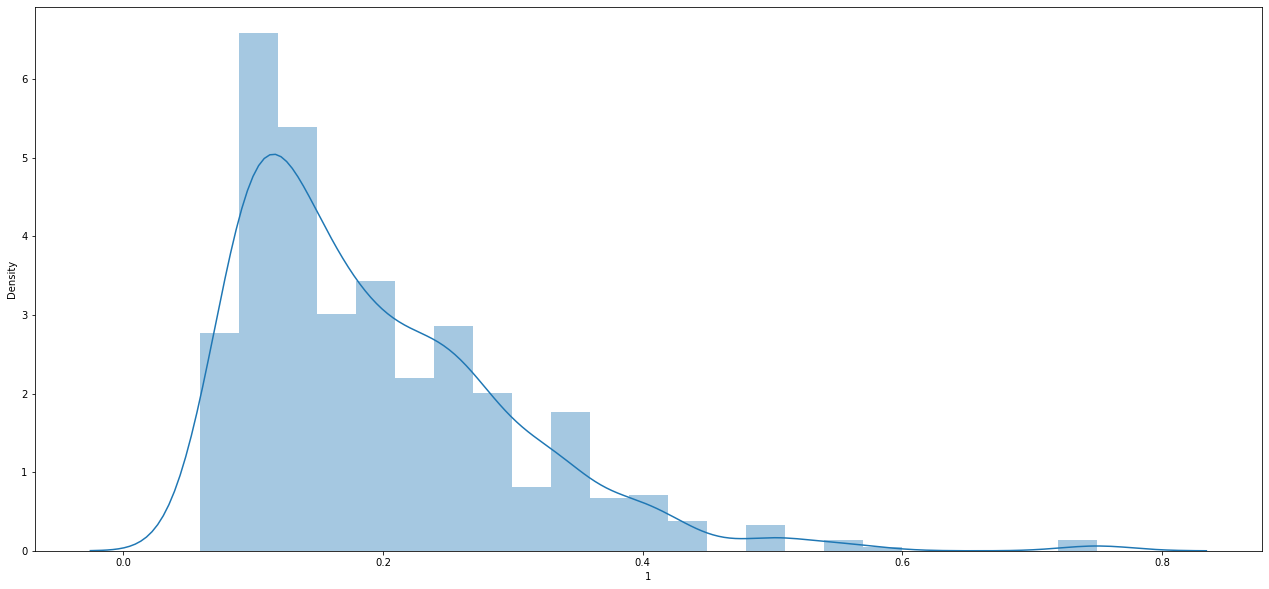

In [117]:
sns.distplot(no_data_plan_churn[1])

In [118]:
permutation_results = pd.concat([population_churn, no_data_plan_churn], axis=1, ignore_index=True)
permutation_results.reset_index(drop=True, inplace=True)

In [119]:
permutation_results

,0,1,2,3
0,0.928571,0.071429,1.000000,NaN
1,1.000000,NaN,0.928571,0.071429
2,1.000000,NaN,0.750000,0.250000
3,0.823529,0.176471,0.625000,0.375000
4,1.000000,NaN,0.666667,0.333333
...,...,...,...,...
995,0.937500,0.062500,1.000000,NaN
996,0.933333,0.066667,1.000000,NaN
997,0.857143,0.142857,0.875000,0.125000
998,0.888889,0.111111,0.909091,0.090909


In [121]:
dff = permutation_results
dff.fillna(0, inplace=True)
dff['Result'] = dff[3] - dff[1]
dff


,0,1,2,3,Result
0,0.928571,0.071429,1.000000,0.000000,-0.071429
1,1.000000,0.000000,0.928571,0.071429,0.071429
2,1.000000,0.000000,0.750000,0.250000,0.250000
3,0.823529,0.176471,0.625000,0.375000,0.198529
4,1.000000,0.000000,0.666667,0.333333,0.333333
...,...,...,...,...,...
995,0.937500,0.062500,1.000000,0.000000,-0.062500
996,0.933333,0.066667,1.000000,0.000000,-0.066667
997,0.857143,0.142857,0.875000,0.125000,-0.017857
998,0.888889,0.111111,0.909091,0.090909,-0.020202


In [122]:
len(dff.loc[dff['Result']>=0]) * 100 / len(dff)


64.0

In [124]:
dff.loc[dff['Result']>=0]


,0,1,2,3,Result
1,1.000000,0.000000,0.928571,0.071429,0.071429
2,1.000000,0.000000,0.750000,0.250000,0.250000
3,0.823529,0.176471,0.625000,0.375000,0.198529
4,1.000000,0.000000,0.666667,0.333333,0.333333
5,1.000000,0.000000,0.750000,0.250000,0.250000
...,...,...,...,...,...
989,0.937500,0.062500,0.866667,0.133333,0.070833
990,0.933333,0.066667,0.916667,0.083333,0.016667
992,1.000000,0.000000,0.769231,0.230769,0.230769
993,1.000000,0.000000,0.900000,0.100000,0.100000


In [126]:


len(dff.loc[dff['Result']<0]) * 100 / len(dff)



36.0

In [130]:
len(dff.loc[dff['Result']<0])/len(dff

0.36

# 64% of experiments are in favor of the null hypothesis.
   # Null hypothesis  is accepted.
    



# Model Creation

In [132]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [133]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [135]:
X= df.drop('Churn',axis=1)
y = df['Churn']

In [136]:
X.shape

(3333, 10)

In [137]:
y.shape

(3333,)

In [140]:
pip install imblearn


     |████████████████████████████████| 199 kB 14.7 MB/s            
     |████████████████████████████████| 189 kB 68.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [201]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

In [205]:
# Implementing Oversampling for Handling Imbalanced 
os =  RandomOverSampler(random_state=42,sampling_strategy=0.5)


X_res, y_res = os.fit_resample(X, y)




In [206]:
X_res.shape,y_res.shape

((4275, 10), (4275,))

In [207]:


from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))



Original dataset shape Counter({0: 2850, 1: 483})
Resampled dataset shape Counter({0: 2850, 1: 1425})


<AxesSubplot:xlabel='DataUsage', ylabel='Churn'>

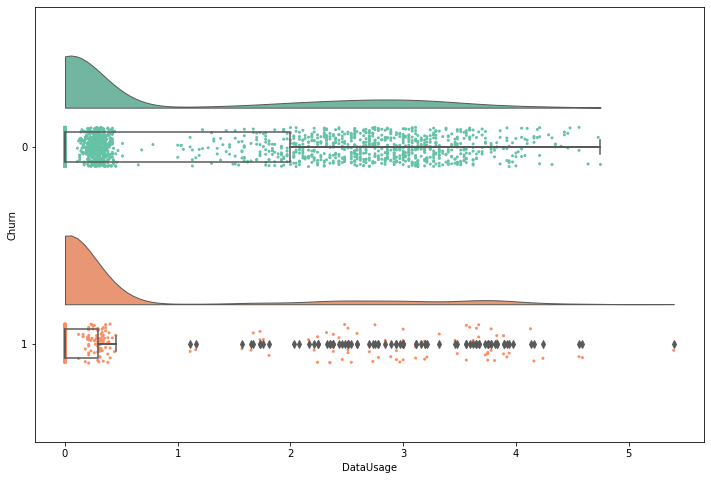

In [148]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

In [149]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


<AxesSubplot:xlabel='CustServCalls', ylabel='Churn'>

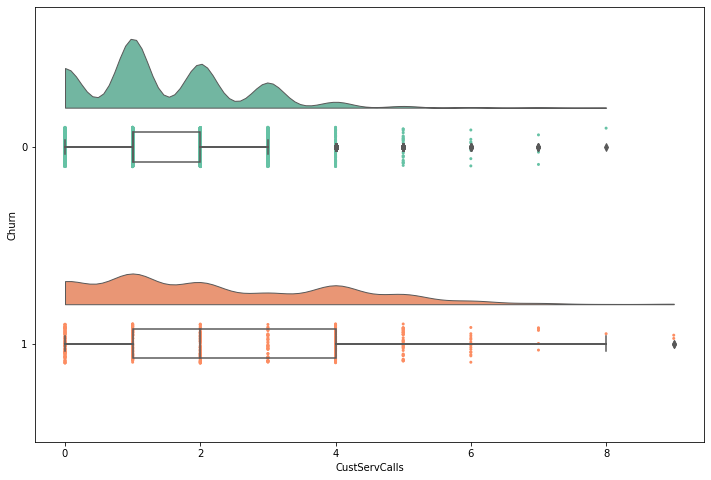

In [150]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'CustServCalls', orient = 'h')

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Churn'>

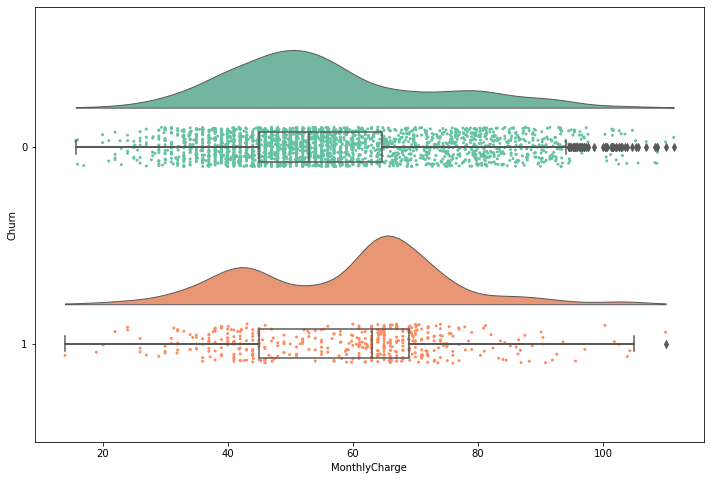

In [151]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'MonthlyCharge', orient = 'h')

<AxesSubplot:xlabel='OverageFee', ylabel='Churn'>

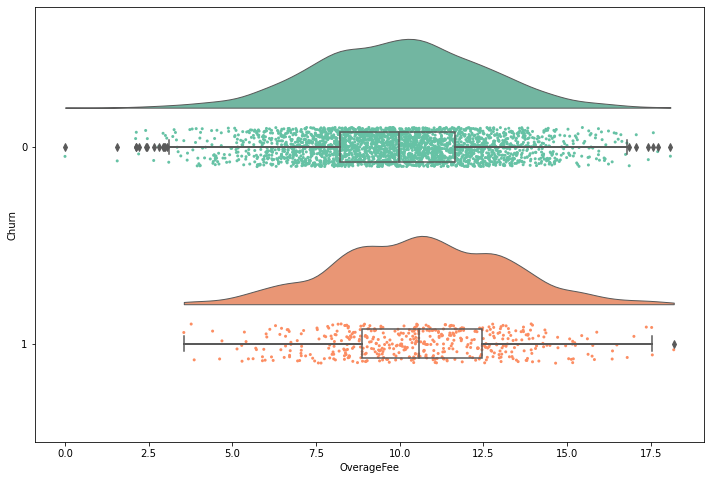

In [152]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'OverageFee', orient = 'h')

<AxesSubplot:xlabel='DataUsage', ylabel='Churn'>

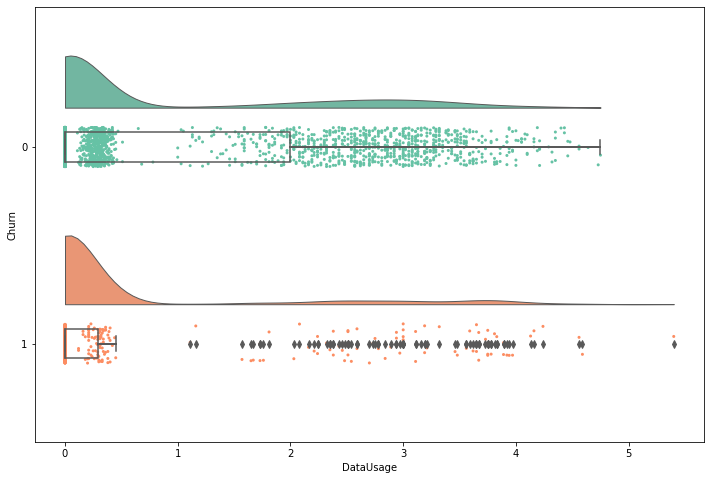

In [153]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

In [156]:
df1 = df[df['Churn']==1]
df0 = df[df['Churn']==0]

<AxesSubplot:ylabel='Density'>

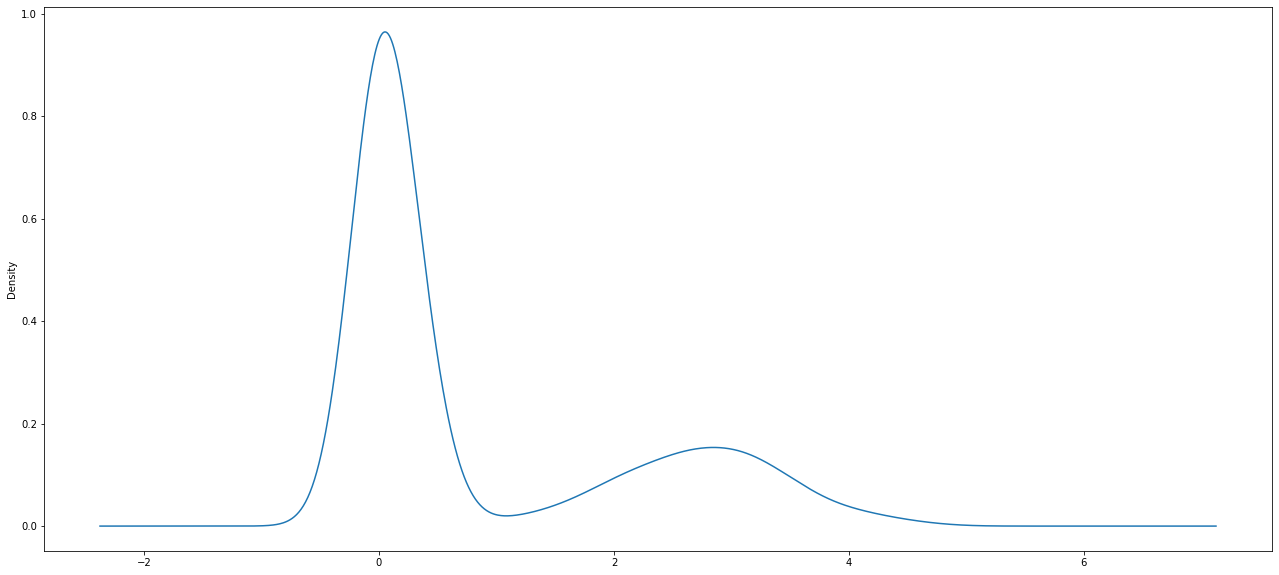

In [158]:
df0['DataUsage'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

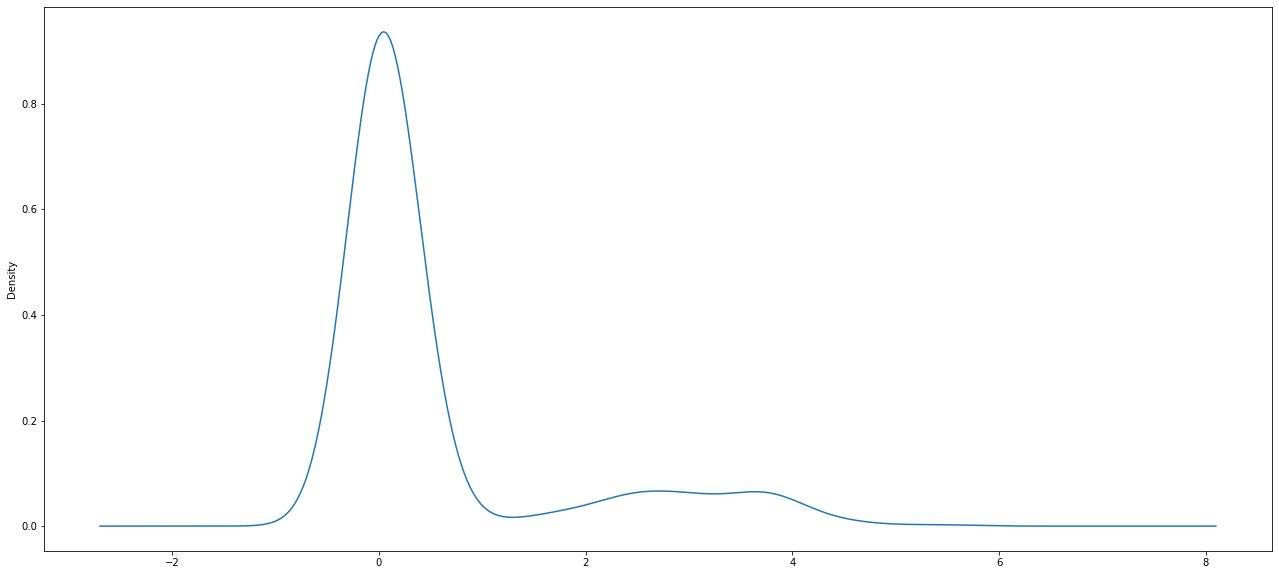

In [159]:
df1['DataUsage'].plot(kind='kde')

In [161]:
df0.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,2850.0,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,0.0,100.793684,0.934737,0.295439,0.862151,1.449825,175.175754,100.283158,55.816246,9.954618,10.158877
std,0.0,39.882350,0.247033,0.456320,1.286095,1.163883,50.181655,19.801157,16.439011,2.514629,2.784489
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.700000,0.000000,0.000000
25%,0.0,73.000000,1.000000,0.000000,0.000000,1.000000,142.825000,87.000000,45.000000,8.230000,8.400000
50%,0.0,100.000000,1.000000,0.000000,0.000000,1.000000,177.200000,100.000000,53.000000,9.980000,10.200000
75%,0.0,127.000000,1.000000,1.000000,2.000000,2.000000,210.300000,114.000000,64.675000,11.660000,12.000000
max,0.0,243.000000,1.000000,1.000000,4.750000,8.000000,315.600000,163.000000,111.300000,18.090000,18.900000


In [163]:
df.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [165]:
X_res.shape,y_res.shape

((5554, 10), (5554,))

In [166]:
X_res.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [168]:
y_res.value_counts()


1    2777
0    2777
Name: Churn, dtype: int64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)



In [171]:
X_train.shape

(3721, 10)

In [172]:
X_test.shape

(1833, 10)

In [174]:
y_train.shape

(3721,)

In [178]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train


array([[ 1.13225791,  0.58055693, -0.50536928, ..., -0.72328601,
        -1.0519135 , -1.18574766],
       [ 0.47011614,  0.58055693, -0.50536928, ..., -1.28536254,
        -0.90337291,  0.09648268],
       [ 0.5719841 , -1.72248395, -0.50536928, ...,  0.3728767 ,
         1.12813119, -0.08168764],
       ...,
       [ 0.92852198,  0.58055693, -0.50536928, ...,  0.72192231,
         0.52811619,  0.60131774],
       [ 1.38692782,  0.58055693, -0.50536928, ...,  0.38647774,
        -0.19614068, -0.93456187],
       [ 0.52105012,  0.58055693,  1.97875106, ...,  2.45556903,
         0.27669951,  0.52389279]])

In [192]:
Xfr =df.drop('Churn',axis=1)
yfr=df['Churn']
X_trainfr,X_testfr,y_trainfr,y_testfr = train_test_split(Xfr,yfr,test_size=0.33, random_state=42)


# Since Random forest work well against Imbalanced datasets we use the default df 



In [193]:
X_trainfr.shape

(2233, 10)

In [194]:
y_trainfr.shape

(2233,)

In [195]:
X_testfr.shape

(1100, 10)

In [196]:
y_testfr.shape

(1100,)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       940
           1       0.87      0.64      0.74       160

    accuracy                           0.93      1100
   macro avg       0.90      0.81      0.85      1100
weighted avg       0.93      0.93      0.93      1100



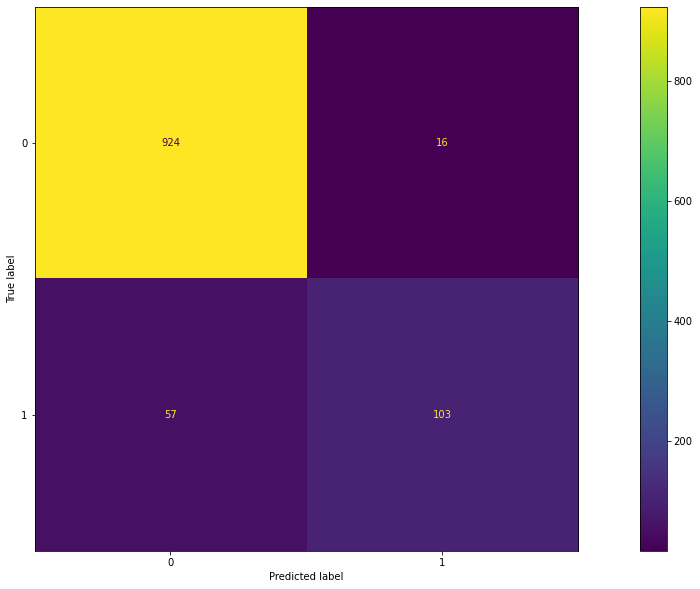

In [197]:
random = RandomForestClassifier(n_estimators=100, random_state=0)
random.fit(X_trainfr, y_trainfr)

pr = random.predict(X_testfr)
print(classification_report(y_testfr, pr))
plot_confusion_matrix(random, X_testfr, y_testfr)  


# Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       942
           1       0.49      1.00      0.65       891

    accuracy                           0.49      1833
   macro avg       0.24      0.50      0.33      1833
weighted avg       0.24      0.49      0.32      1833



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


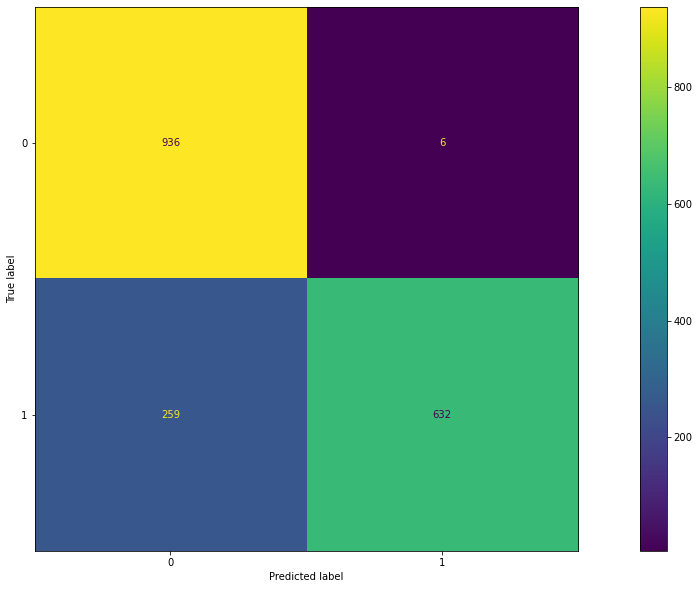

In [212]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(random, X_test, y_test)  

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       940
           1       0.88      0.68      0.77       160

    accuracy                           0.94      1100
   macro avg       0.91      0.83      0.87      1100
weighted avg       0.94      0.94      0.94      1100



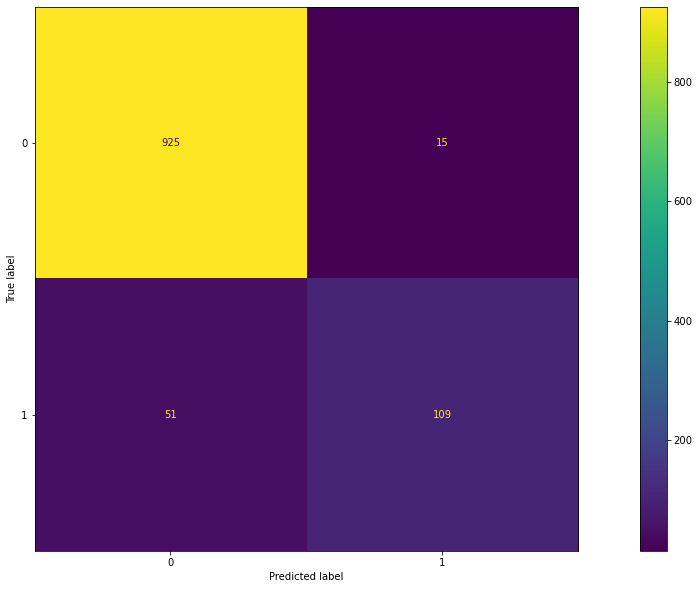

In [213]:
clfg = GradientBoostingClassifier(n_estimators=200, max_depth=2, random_state=0)
clfg.fit(X_trainfr, y_trainfr)

pg = clfg.predict(X_testfr)
print(classification_report(y_testfr, pg))
plot_confusion_matrix(clfg, X_testfr, y_testfr) 

# Cross Validation

In [216]:
##stratified Cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model=RandomForestClassifier()
scores=cross_val_score(model,Xfr,yfr,cv=skfold)
print(np.mean(scores))

0.9363947780115446


In [217]:
##stratified Cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model=GradientBoostingClassifier()
scores=cross_val_score(model,Xfr,yfr,cv=skfold)
print(np.mean(scores))

0.9366959774145404


# Hyper paramater tuning


In [220]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [222]:


rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_trainfr,y_trainfr)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   4.9s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   4.8s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   5.2s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14,

[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   7.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   4.3s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   4.2s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   4.3s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   7.9s
[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   8.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.5s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.5s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.5s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   8.3s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   8.4s
[CV] END criterion=

[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   7.1s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   7.0s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   7.3s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   8.1s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   8.0s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   7.7s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END criteri

[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=400; total time=   1.6s
[CV] END criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1200; total time=   4.2s
[CV] END criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1200; total time=   4.0s
[CV] END criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1200; total time=   4.2s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END criterion=gin

[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1600; total time=   6.0s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1600; total time=   6.9s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   5.1s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   4.0s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1000; total time=   4.4s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [223]:


rf_randomcv.best_params_



{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 450,
 'criterion': 'entropy'}

In [224]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [225]:
best_random_grid=rf_randomcv.best_estimator_

In [227]:



from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred=best_random_grid.predict(X_testfr)
print(confusion_matrix(y_testfr,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_testfr,y_pred)))
print("Classification report: {}".format(classification_report(y_testfr,y_pred)))



[[928  12]
 [ 56 104]]
Accuracy Score 0.9381818181818182
Classification report:               precision    recall  f1-score   support

           0       0.94      0.99      0.96       940
           1       0.90      0.65      0.75       160

    accuracy                           0.94      1100
   macro avg       0.92      0.82      0.86      1100
weighted avg       0.94      0.94      0.93      1100



In [228]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)





{'criterion': ['entropy'], 'max_depth': [450], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [0, 100, 200, 300, 400]}


In [229]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_trainfr,y_trainfr)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12,

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.8s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.9s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.7s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/_base.py", line 134, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition

[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END crit

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.93372237 0.93462124 0.9341708  0.9355181         nan
 0.93417481 0.93327394 0.93641296 0.9355181         nan 0.93462124
 0.93597053 0.93775424 0.93551409        nan 0.93551409 0.93596453
 0.93686139 0.93596453        nan 0.93371837 0.93462124 0.9355201
 0.93506766        nan 0.93327394 0.93596252 0.93417481 0.93596653
        nan 0.93372237 0.93641296 0.93506967 0.93372237        nan
 0.93462124 0.93596252 0.93372438 0.93685738        nan 0.93461923
 0.93417681 0.93327594 0.93596052        nan 0.93506766 0.93551209
 0.93641296 0.93596453        nan 0.9296925  0.93596252 0.93506967
 0.9355181         nan 0.93193065 0.93282551 0.93238309 0.93461923
        nan 0.93147622 0.93461723 0.93506967 0.93282551        nan
 0.93729981 0.93462124 0.93551409 0.93327594        nan 0.93282751
 0.93372438 0.93417281 0.93506967]
  categor

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [450],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [230]:


grid_search.best_estimator_



RandomForestClassifier(criterion='entropy', max_depth=450, max_features='sqrt',
                       min_samples_split=14, n_estimators=300)

In [231]:
best_grid=grid_search.best_estimator_

In [232]:


y_pred=best_grid.predict(X_testfr)
print(confusion_matrix(y_testfr,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_testfr,y_pred)))
print("Classification report: {}".format(classification_report(y_testfr,y_pred)))



[[928  12]
 [ 56 104]]
Accuracy Score 0.9381818181818182
Classification report:               precision    recall  f1-score   support

           0       0.94      0.99      0.96       940
           1       0.90      0.65      0.75       160

    accuracy                           0.94      1100
   macro avg       0.92      0.82      0.86      1100
weighted avg       0.94      0.94      0.93      1100



              precision    recall  f1-score   support

           0       0.94      0.99      0.97       940
           1       0.90      0.65      0.76       160

    accuracy                           0.94      1100
   macro avg       0.92      0.82      0.86      1100
weighted avg       0.94      0.94      0.93      1100



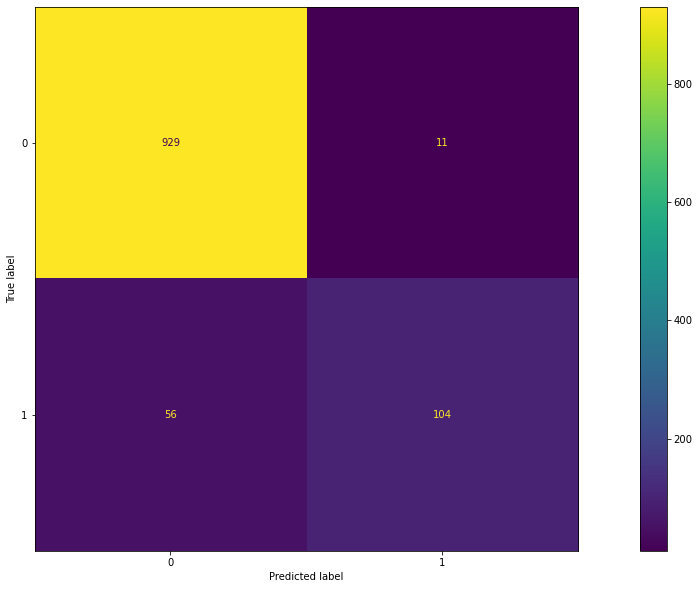

In [233]:
random = RandomForestClassifier(criterion='entropy', max_depth=450, max_features='sqrt',
                       min_samples_split=14, n_estimators=300)
random.fit(X_trainfr, y_trainfr)

pr = random.predict(X_testfr)
print(classification_report(y_testfr, pr))
plot_confusion_matrix(random, X_testfr, y_testfr)  


# Conclusion
Steps to Retain Customers

    More Customer Service calls mean the customer is more prone to churn.
    Optimize the price of talk time for segment 1 customers.
    Introduce a data plan to those customers who are using data without data plans ASAP.
    Introduce exciting data plans to segment 1 customers.
    If the possible optimizing price of data plans can retain segment 2 customers also.
